<h1 style="font-size: 3em; color: #0000FF; text-shadow: 2px 2px 4px #000000, 0 0 10px #0000FF, 0 0 20px #0000FF; text-align: center; font-weight: bold; text-transform: uppercase;">Predict Credit Consumption</h1>


<h1 style="font-size: 3em; color: #0000FF; text-shadow: 2px 2px 4px #000000, 0 0 10px #0000FF, 0 0 20px #0000FF; text-align: center; font-weight: bold; text-transform: uppercase;">of</h1>


<h1 style="font-size: 3em; color: #0000FF; text-shadow: 2px 2px 4px #000000, 0 0 10px #0000FF, 0 0 20px #0000FF; text-align: center; font-weight: bold; text-transform: uppercase;">Customer For  Leading Bank</h1>


In [124]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf # Optimization of straight line
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF Selection
from patsy import dmatrices # Dependency for VIF

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest ,f_classif

from sklearn.metrics import confusion_matrix,classification_report

# Business Objectives:

## One of the leading banks provided below data
 
### a. Customer Demographic
### b. Customer Behavioural data (information on liabilities, assets and history of transactions witthe bank for each customer). Data has been provided for a particular set of customers' credit card spend in the previous 3 months (April, May & June) and their expected average spend in the coming 3 months (July, August & September)
### c. Credit consumption


In [125]:
Customer_Demographics=pd.read_excel("D:/A LABS FLODER/ML using python/CASE STUDYS/Predict Cred Card Consumption/CustomerDemographics.xlsx")
Customer_Demographics

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0
...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0


In [126]:
# CustomerBehaviorData

df=pd.read_excel("D:/A LABS FLODER/ML using python/CASE STUDYS/Predict Cred Card Consumption/CustomerBehaviorData.xlsx")
df

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,35,11,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,5,8,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,10,108,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,11,12,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29


In [127]:
# here i aggregate april,may,june months data and 3 investments in june 
# NOTE : 4 th investment have -ve values soo i didn't aggregate that ,it contain aount 4k rows  in -ve 

df['mean_spend_cc_apr_may_jun']=df[['cc_cons_apr','cc_cons_may','cc_cons_jun']].mean(axis=1)
df['mean_spend_dc_cons_apr_may_jun']=df[['dc_cons_apr','dc_cons_may','dc_cons_jun']].mean(axis=1)
df['mean_cc_count_apr_may_jun']=df[['cc_count_apr','cc_count_may','cc_count_jun']].mean(axis=1)
df['mean_dc_count_apr_may_jun']=df[['dc_count_apr','dc_count_may','dc_count_jun']].mean(axis=1)
df['mean_investments_june']=df[['investment_1','investment_2','investment_3']].mean(axis=1)
df['mean_credit_amount_apr,may_jun']=df[['credit_amount_apr','credit_amount_may','credit_amount_jun']].mean(axis=1)
df['mean_debit_amount_apr_may_jun']=df[['debit_amount_apr','debit_amount_may','debit_amount_jun']].mean(axis=1)
df['mean_credit_count_apr_may_jun']=df[['credit_count_apr','credit_count_may','credit_count_jun']].mean(axis=1)
df['mean_debit_count_apr_may_jun']=df[['debit_count_apr','debit_count_may','debit_count_jun']].mean(axis=1)
df['mean_max_credit_amount_apr_may_jun']=df[['max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun']].mean(axis=1)

In [128]:
# what ever columns i used for aggregations those columns and unnecessary columns i removed here 

columns_to_drop = ['cc_cons_apr', 'cc_cons_may','cc_cons_jun','dc_cons_apr','dc_cons_may','dc_cons_jun','cc_count_apr','cc_count_may','cc_count_jun',
                   'dc_count_apr','dc_count_may','dc_count_jun','investment_1','investment_2','investment_3','investment_4','credit_amount_apr','credit_amount_may',
                  'credit_amount_jun','debit_amount_apr','debit_amount_may','debit_amount_jun','credit_count_apr','credit_count_may','credit_count_jun',
                 'debit_count_apr','debit_count_may','debit_count_jun','max_credit_amount_apr','max_credit_amount_may','max_credit_amount_jun','personal_loan_active',
                  'vehicle_loan_active','personal_loan_closed','vehicle_loan_closed','loan_enq']
df = df.drop(columns=columns_to_drop)

In [129]:
# CustomerBehaviorData
df

,ID,card_lim,emi_active,mean_spend_cc_apr_may_jun,mean_spend_dc_cons_apr_may_jun,mean_cc_count_apr_may_jun,mean_dc_count_apr_may_jun,mean_investments_june,"mean_credit_amount_apr,may_jun",mean_debit_amount_apr_may_jun,mean_credit_count_apr_may_jun,mean_debit_count_apr_may_jun,mean_max_credit_amount_apr_may_jun
0,17051,358000,3448.84,3035.310000,4228.946667,10.333333,32.000000,1.436104e+05,39339.790000,38479.500000,13.000000,76.333333,48814.000000
1,11491,114000,3812.69,29625.846667,5197.143333,21.666667,7.333333,2.139984e+06,31136.666667,53808.333333,13.000000,31.000000,23696.333333
2,7433,360000,9432.90,17809.550000,5713.830000,44.000000,36.000000,6.865587e+04,30454.666667,40384.703333,40.000000,23.666667,23906.666667
3,14606,155000,144.61,19525.163333,4833.386667,10.000000,31.333333,1.533390e+05,43618.263333,89745.210000,24.000000,26.666667,96506.333333
4,8381,362000,1887.89,11974.150000,1745.833333,29.666667,30.666667,1.036524e+04,329982.000000,66653.823333,13.000000,25.000000,18873.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,595000,7870.88,17464.370000,4091.193333,10.333333,9.666667,3.489516e+05,69526.080000,60585.396667,23.333333,22.333333,39602.000000
19996,14224,13000,3668.30,9749.816667,3228.033333,47.666667,25.666667,7.326206e+05,57862.000000,31530.106667,31.000000,26.000000,20290.666667
19997,18740,124000,5450.34,4909.131667,5352.680000,30.000000,6.666667,7.671034e+04,76552.286667,96173.826667,8.666667,52.666667,17389.333333
19998,18134,371000,59.29,13399.753333,14353.666667,24.000000,37.333333,1.711752e+04,34649.000000,143604.683333,44.333333,38.666667,33406.333333


In [130]:
Credit_consumption=pd.read_excel("D:/A LABS FLODER/ML using python/CASE STUDYS/Predict Cred Card Consumption/CreditConsumptionData.xlsx")
Credit_consumption

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0
...,...,...
19995,12512,NaN
19996,14224,NaN
19997,18740,NaN
19998,18134,NaN


In [131]:
# here i am merging the Customer_Demographics and aggregate CustomerBehaviorData(df)

df_1=pd.merge(left=Customer_Demographics,right=df,left_on='ID',right_on='ID',how='inner')
df_1

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,mean_spend_cc_apr_may_jun,mean_spend_dc_cons_apr_may_jun,mean_cc_count_apr_may_jun,mean_dc_count_apr_may_jun,mean_investments_june,"mean_credit_amount_apr,may_jun",mean_debit_amount_apr_may_jun,mean_credit_count_apr_may_jun,mean_debit_count_apr_may_jun,mean_max_credit_amount_apr_may_jun
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,8144.430000,2764.193333,14.666667,26.666667,35886.333333,158506.250000,77210.640000,15.333333,57.666667,38330.666667
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,11966.243333,4638.666667,19.333333,18.000000,381123.566667,165532.506667,70207.263333,4.000000,28.333333,42800.000000
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,11324.663333,23829.766667,28.666667,24.666667,93332.866667,36822.000000,93883.763333,18.333333,59.666667,359270.930000
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,7639.770000,5844.726667,52.000000,2.000000,67834.416667,112150.116667,27502.776667,3.666667,40.000000,71727.333333
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,12805.913333,11433.620000,41.000000,66.000000,43382.050000,56274.666667,96428.630000,8.333333,83.333333,36203.346667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,24710.913333,4464.680000,19.000000,35.333333,134624.833333,49529.000000,124301.070000,12.666667,25.000000,32346.666667
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,7263.923333,2753.666667,20.333333,11.666667,590556.416667,52535.333333,42202.743333,34.333333,9.000000,90616.666667
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,4613.670000,32492.163333,4.333333,6.333333,47940.840000,40452.333333,109944.793333,2.666667,73.333333,32545.666667
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,11739.270000,5372.153333,42.666667,5.000000,21297.810000,48364.586667,37126.373333,25.333333,55.666667,38661.333333


In [132]:
final_df=pd.merge(left=df_1,right=Credit_consumption,left_on='ID',right_on='ID',how='inner')
final_df

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,mean_spend_dc_cons_apr_may_jun,mean_cc_count_apr_may_jun,mean_dc_count_apr_may_jun,mean_investments_june,"mean_credit_amount_apr,may_jun",mean_debit_amount_apr_may_jun,mean_credit_count_apr_may_jun,mean_debit_count_apr_may_jun,mean_max_credit_amount_apr_may_jun,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,2764.193333,14.666667,26.666667,35886.333333,158506.250000,77210.640000,15.333333,57.666667,38330.666667,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,4638.666667,19.333333,18.000000,381123.566667,165532.506667,70207.263333,4.000000,28.333333,42800.000000,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,23829.766667,28.666667,24.666667,93332.866667,36822.000000,93883.763333,18.333333,59.666667,359270.930000,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,5844.726667,52.000000,2.000000,67834.416667,112150.116667,27502.776667,3.666667,40.000000,71727.333333,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,11433.620000,41.000000,66.000000,43382.050000,56274.666667,96428.630000,8.333333,83.333333,36203.346667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,4464.680000,19.000000,35.333333,134624.833333,49529.000000,124301.070000,12.666667,25.000000,32346.666667,NaN
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,2753.666667,20.333333,11.666667,590556.416667,52535.333333,42202.743333,34.333333,9.000000,90616.666667,NaN
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,32492.163333,4.333333,6.333333,47940.840000,40452.333333,109944.793333,2.666667,73.333333,32545.666667,NaN
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,5372.153333,42.666667,5.000000,21297.810000,48364.586667,37126.373333,25.333333,55.666667,38661.333333,NaN


In [133]:
final_df = final_df.drop('Emp_Tenure_Years', axis=1)

In [134]:
final_df

,ID,account_type,gender,age,Income,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,card_lim,...,mean_spend_dc_cons_apr_may_jun,mean_cc_count_apr_may_jun,mean_dc_count_apr_may_jun,mean_investments_june,"mean_credit_amount_apr,may_jun",mean_debit_amount_apr_may_jun,mean_credit_count_apr_may_jun,mean_debit_count_apr_may_jun,mean_max_credit_amount_apr_may_jun,cc_cons
0,19427,current,M,63,MEDIUM,10,628.0,1,5.0,519000,...,2764.193333,14.666667,26.666667,35886.333333,158506.250000,77210.640000,15.333333,57.666667,38330.666667,NaN
1,16150,current,M,36,MEDIUM,10,656.0,0,12.0,402000,...,4638.666667,19.333333,18.000000,381123.566667,165532.506667,70207.263333,4.000000,28.333333,42800.000000,NaN
2,11749,current,F,28,MEDIUM,10,314.0,1,13.0,114000,...,23829.766667,28.666667,24.666667,93332.866667,36822.000000,93883.763333,18.333333,59.666667,359270.930000,NaN
3,11635,current,M,32,MEDIUM,2,614.0,1,19.0,298000,...,5844.726667,52.000000,2.000000,67834.416667,112150.116667,27502.776667,3.666667,40.000000,71727.333333,NaN
4,8908,current,M,32,HIGH,7,750.0,1,18.0,381000,...,11433.620000,41.000000,66.000000,43382.050000,56274.666667,96428.630000,8.333333,83.333333,36203.346667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,6,354.0,1,7.0,255000,...,4464.680000,19.000000,35.333333,134624.833333,49529.000000,124301.070000,12.666667,25.000000,32346.666667,NaN
19996,15992,current,M,53,MEDIUM,5,809.0,0,14.0,518000,...,2753.666667,20.333333,11.666667,590556.416667,52535.333333,42202.743333,34.333333,9.000000,90616.666667,NaN
19997,7081,current,F,66,MEDIUM,1,466.0,0,10.0,359000,...,32492.163333,4.333333,6.333333,47940.840000,40452.333333,109944.793333,2.666667,73.333333,32545.666667,NaN
19998,6821,current,M,32,LOW,8,619.0,0,17.0,523000,...,5372.153333,42.666667,5.000000,21297.810000,48364.586667,37126.373333,25.333333,55.666667,38661.333333,NaN


# Data Exploratory analysis

In [135]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  20000 non-null  int64  
 1   account_type                        19999 non-null  object 
 2   gender                              19999 non-null  object 
 3   age                                 20000 non-null  int64  
 4   Income                              19999 non-null  object 
 5   Tenure_with_Bank                    20000 non-null  int64  
 6   region_code                         19999 non-null  float64
 7   NetBanking_Flag                     20000 non-null  int64  
 8   Avg_days_between_transaction        19997 non-null  float64
 9   card_lim                            20000 non-null  int64  
 10  emi_active                          19999 non-null  float64
 11  mean_spend_cc_apr_may_jun           20000

In [136]:
# checking missing values 

final_df.isna().sum()

ID                                       0
account_type                             1
gender                                   1
age                                      0
Income                                   1
Tenure_with_Bank                         0
region_code                              1
NetBanking_Flag                          0
Avg_days_between_transaction             3
card_lim                                 0
emi_active                               1
mean_spend_cc_apr_may_jun                0
mean_spend_dc_cons_apr_may_jun           0
mean_cc_count_apr_may_jun                0
mean_dc_count_apr_may_jun                0
mean_investments_june                    0
mean_credit_amount_apr,may_jun           0
mean_debit_amount_apr_may_jun            0
mean_credit_count_apr_may_jun            0
mean_debit_count_apr_may_jun             0
mean_max_credit_amount_apr_may_jun       0
cc_cons                               5000
dtype: int64

##  Number of rows & Number of columns in the dataset

In [137]:
print("In this final_df dataframe having " + str(len(final_df)) + " rows and " + str(len(final_df.columns)) + " columns are there")

In this final_df dataframe having 20000 rows and 22 columns are there


##  Number of numerical & categorical columns in the data set

In [138]:
# after merging the both dataframes

num_old_df=final_df.select_dtypes(exclude='object')
obj_old_df=final_df.select_dtypes(include='object')
no_of_numericals_columns=len(num_old_df.columns)
no_of_categorical_columns=len(obj_old_df.columns)
print("In the above final_df dataframe having "+ str(no_of_numericals_columns)+ " numericals_columns and "+ str(no_of_categorical_columns)+ " categorical_columns are there")

In the above final_df dataframe having 19 numericals_columns and 3 categorical_columns are there


## description about numericals_columns

In [139]:
def custom_description( x ):
    
    non_missing = x.isnull().count()
    missing = x.isnull().sum()
    missing_pct = missing / non_missing
    
    p25 = x.quantile(0.25)
    p75 = x.quantile(0.75)
    
    iqr = p75 - p25
    
    lc_iqr = p25 - 1.5 * iqr
    uc_iqr = p75 + 1.5 * iqr
    
    return pd.Series( [ x.dtypes, x.count(), x.nunique(), non_missing, missing, missing_pct, 
                       x.sum(), x.var(), x.std(), x.mean(), 
                       iqr, lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                     
                    index = ['dtype', 'rows','unique values', 'non_missing', 'missing', 'missing_pct',
                             'sum', 'var', 'std', 'mean',
                             'Interquartile Range', 'IQR lower bound', 'IQR upper bound',
                             'min', '1%', '5%', '10%', 
                             '25%', '50%', '75%', 
                             '90%', '95%', '99%', 'max'])

In [140]:
num_old_df.apply(custom_description)

,ID,age,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,card_lim,emi_active,mean_spend_cc_apr_may_jun,mean_spend_dc_cons_apr_may_jun,mean_cc_count_apr_may_jun,mean_dc_count_apr_may_jun,mean_investments_june,"mean_credit_amount_apr,may_jun",mean_debit_amount_apr_may_jun,mean_credit_count_apr_may_jun,mean_debit_count_apr_may_jun,mean_max_credit_amount_apr_may_jun,cc_cons
dtype,int64,int64,int64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
rows,20000,20000,20000,19999,20000,19997,20000,19999,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,15000
unique values,20000,43,10,210,2,19,308,5940,19978,19752,518,206,19962,19926,19993,196,365,19364,12260
non_missing,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
missing,0,0,0,1,0,3,0,1,0,0,0,0,0,0,0,0,0,0,5000
missing_pct,0.0,0.0,0.0,0.00005,0.0,0.00015,0.0,0.00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
sum,199990000,953446,109921,11978588.0,14360,220862.0,5566927922,307961976.6,307871095.921667,152952525.755,777676.666667,410804.0,5789750078.5795,1609605618.006667,1413827663.78,287168.0,811621.833333,1103178452.716667,827365948.0
var,33335000.0,921.715698,8.239496,48446.312129,0.202486,30.036454,32673565581.8619,14461042739.004179,189907542.726194,78787400.031019,1600.903695,168.7593,979066365624.298462,9736620851.715336,9199722486.620077,129.323849,433.300816,11090020288.536024,9539618820.721478
std,5773.647028,30.359771,2.870452,220.10523,0.449985,5.480552,180758.307089,120254.075769,13780.694566,8876.226678,40.011295,12.990739,989477.824726,98674.317083,95915.183817,11.372064,20.815879,105309.165264,97670.972252
mean,9999.5,47.6723,5.49605,598.959348,0.718,11.044757,278346.3961,15398.868773,15393.554796,7647.626288,38.883833,20.5402,289487.503929,80480.2809,70691.383189,14.3584,40.581092,55158.922636,55157.729867


# Univariate & Bi Variate analysis on dataset

## Univariate analysis for numericals_columns

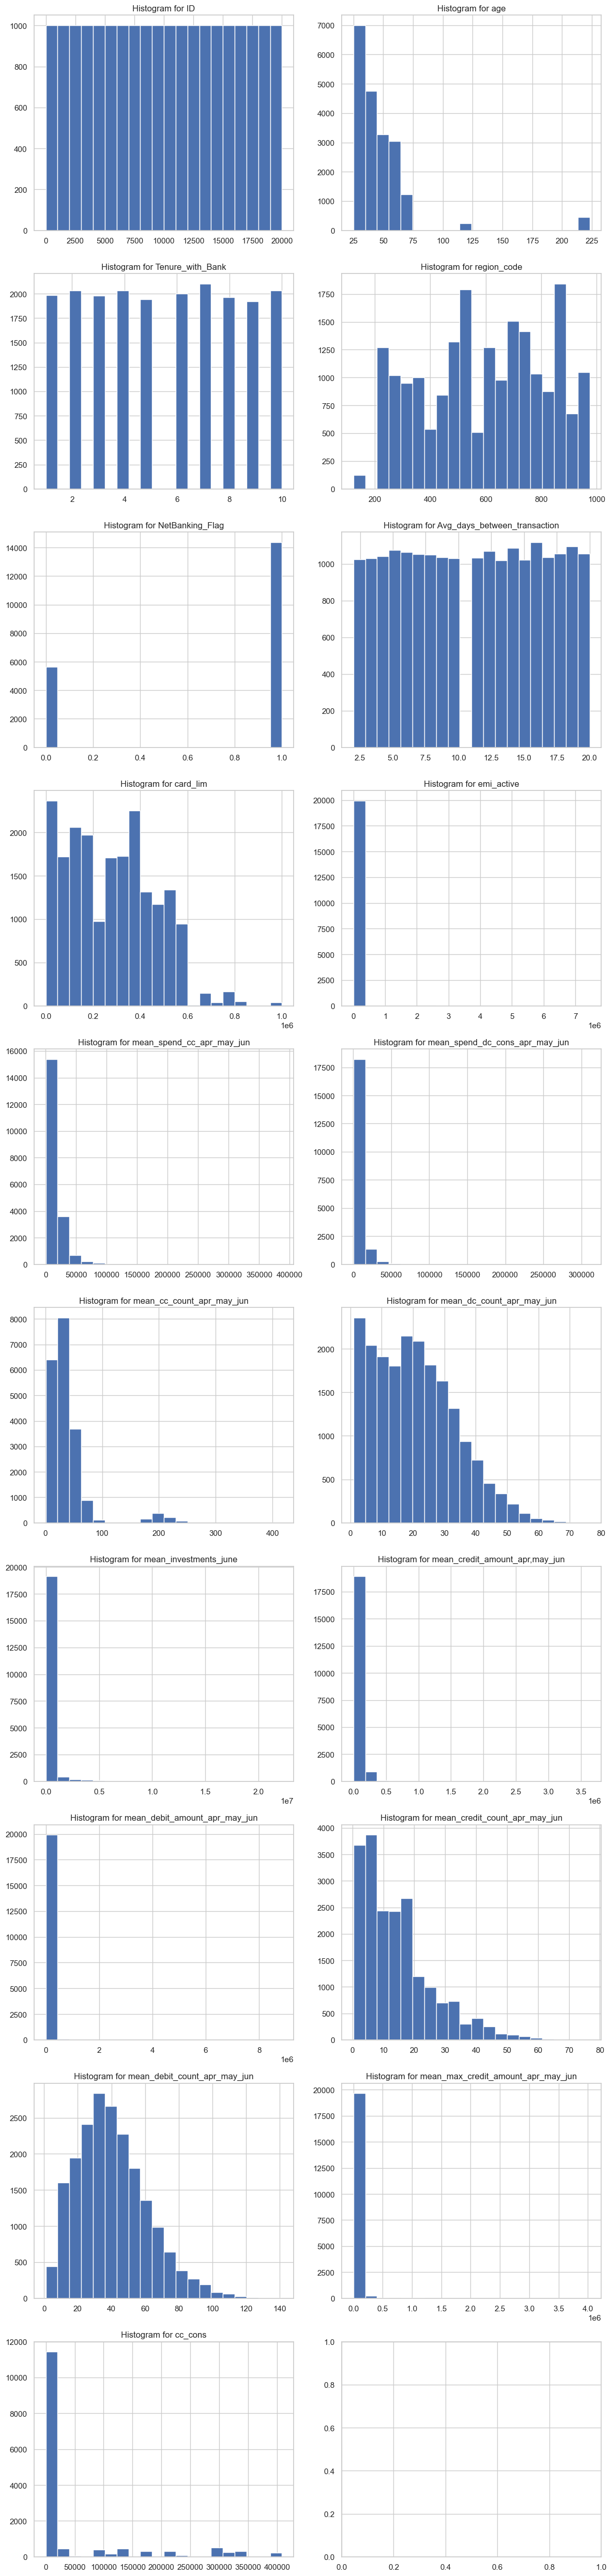

In [141]:
# Get numerical columns in the DataFrame
numerical_columns = final_df.select_dtypes(include=['number']).columns

# Calculate the number of subplots needed
num_subplots = len(numerical_columns)

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=num_subplots // 2 + num_subplots % 2, ncols=2, figsize=(12, 5 * (num_subplots // 2 + num_subplots % 2)))

# Loop through numerical columns
for i, column in enumerate(numerical_columns):
    # Calculate the position in the subplot grid
    row = i // 2
    col = i % 2

    # Plot histogram
    axes[row, col].hist(final_df[column], bins=20)
    axes[row, col].set_title(f"Histogram for {column}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


## Univariate analysis for categorical_columns

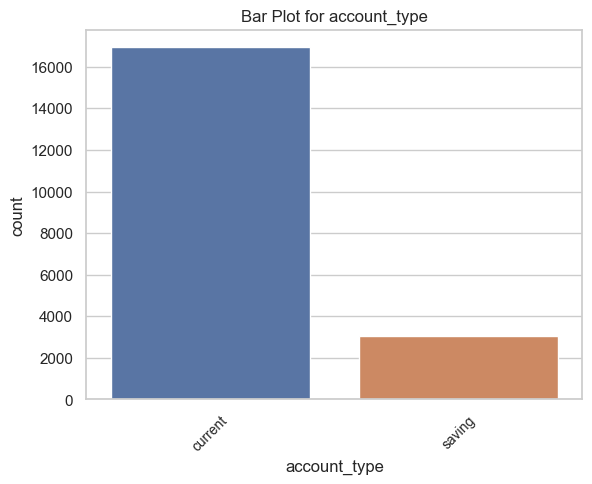

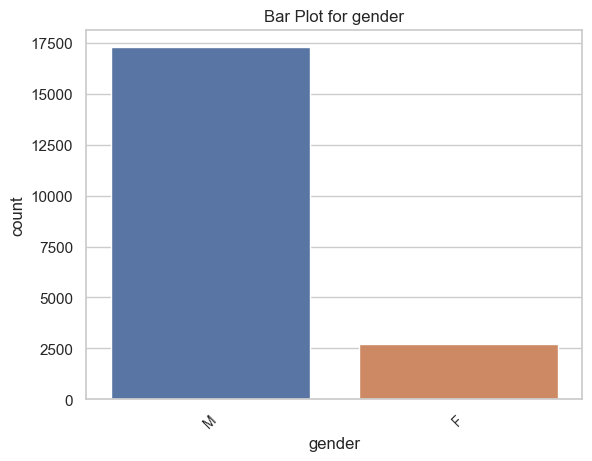

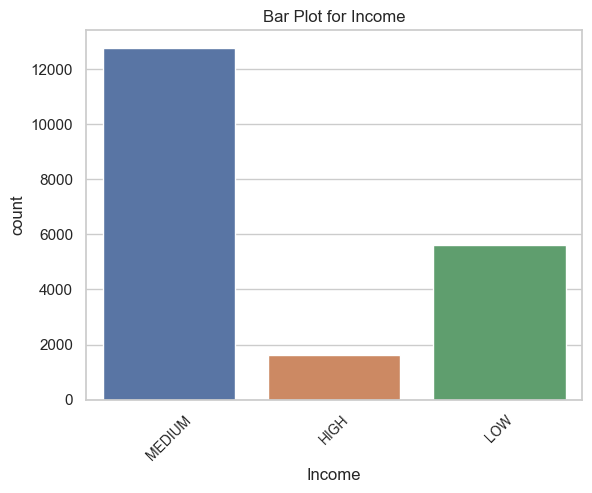

In [142]:
# Get categorical columns in the DataFrame
obj_old_df = final_df.select_dtypes(include='object')


for i in obj_old_df:
    sns.countplot(x=i, data=final_df)
    plt.title(f"Bar Plot for {i}")
    plt.xticks(rotation=45, fontsize=10)
    plt.show()


# Bi Variate analysis
## Relationship between numeric and categorical variables

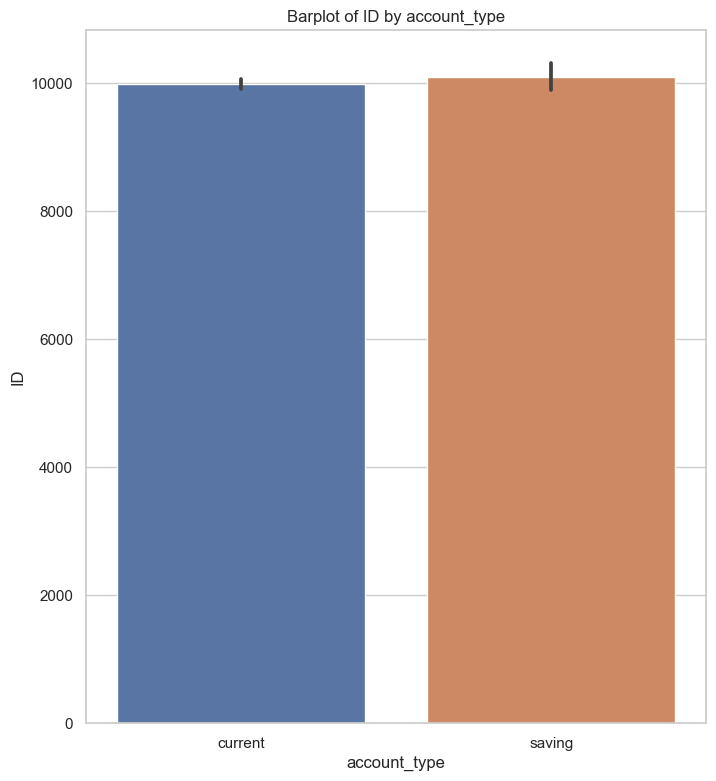

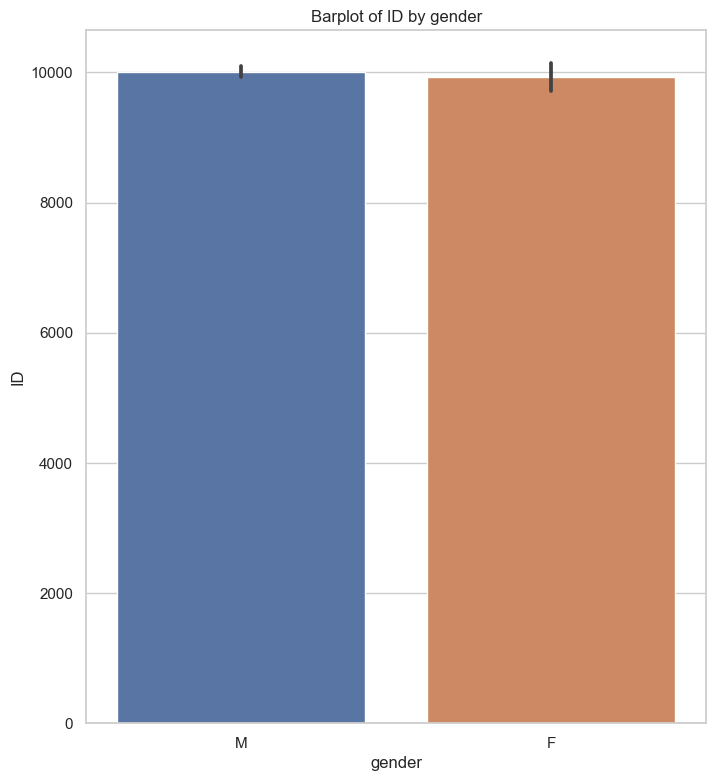

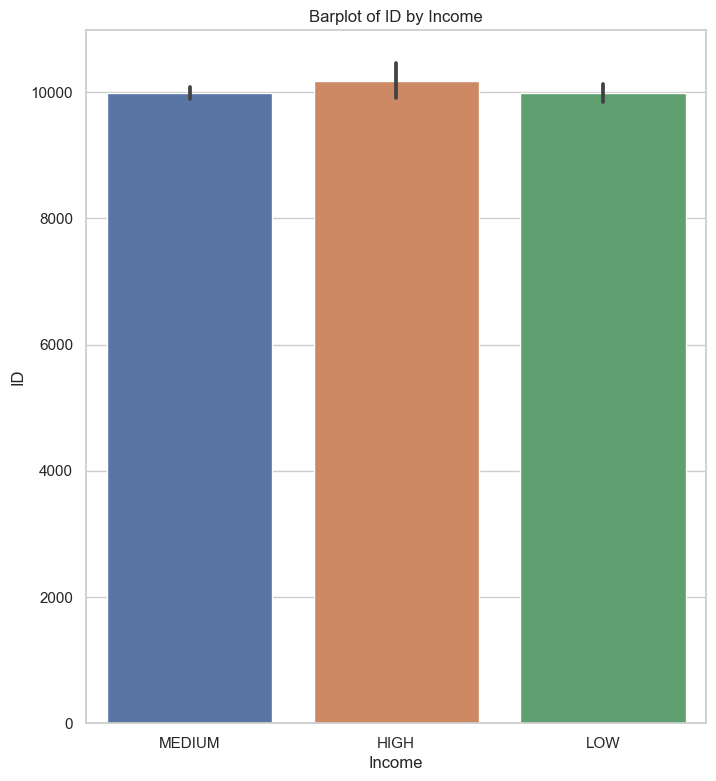

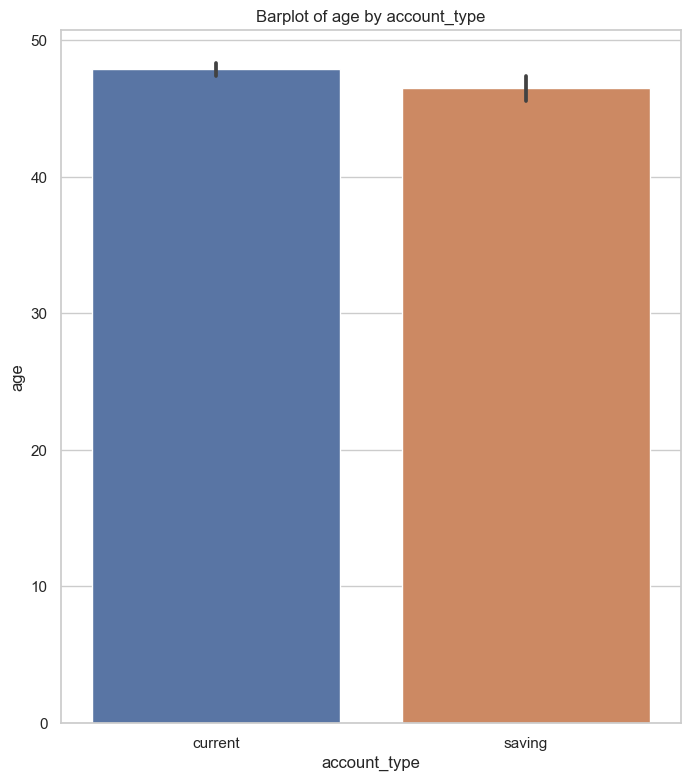

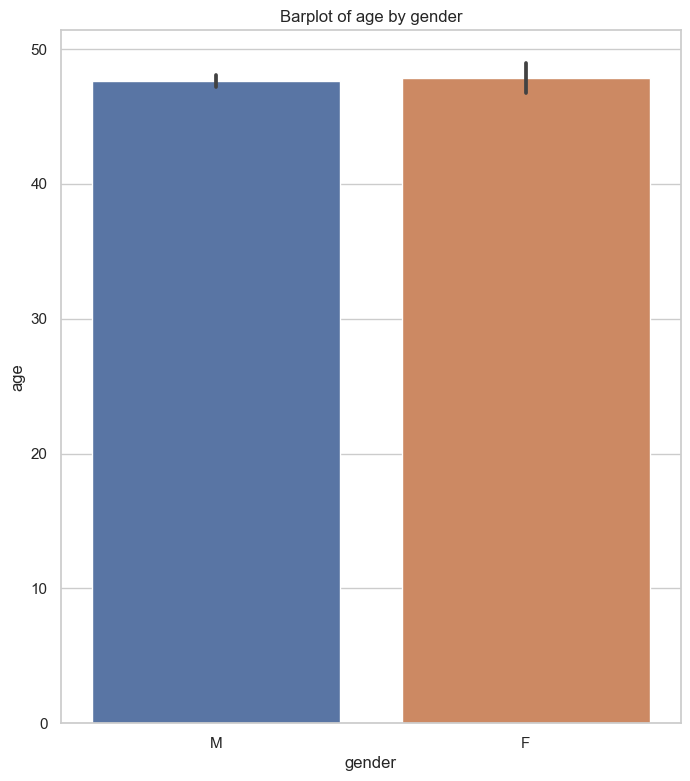

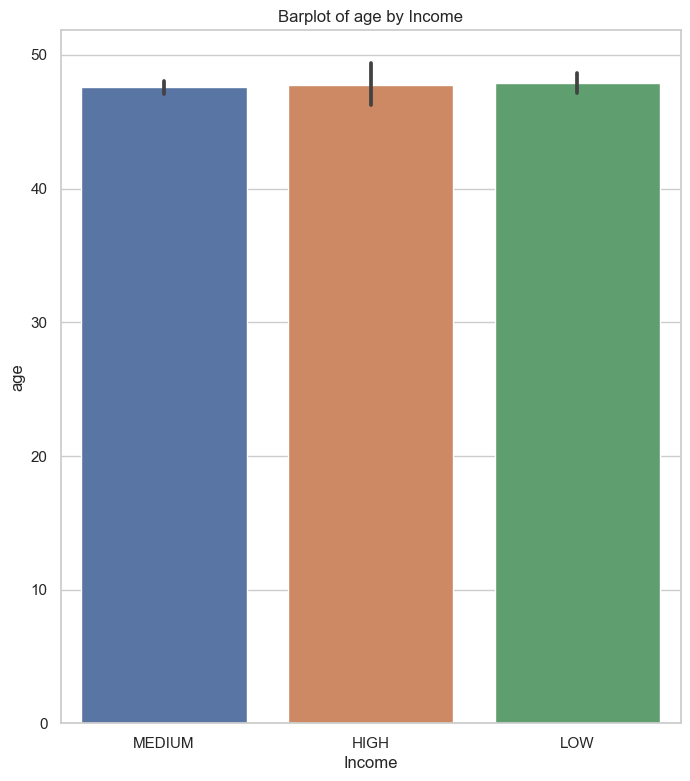

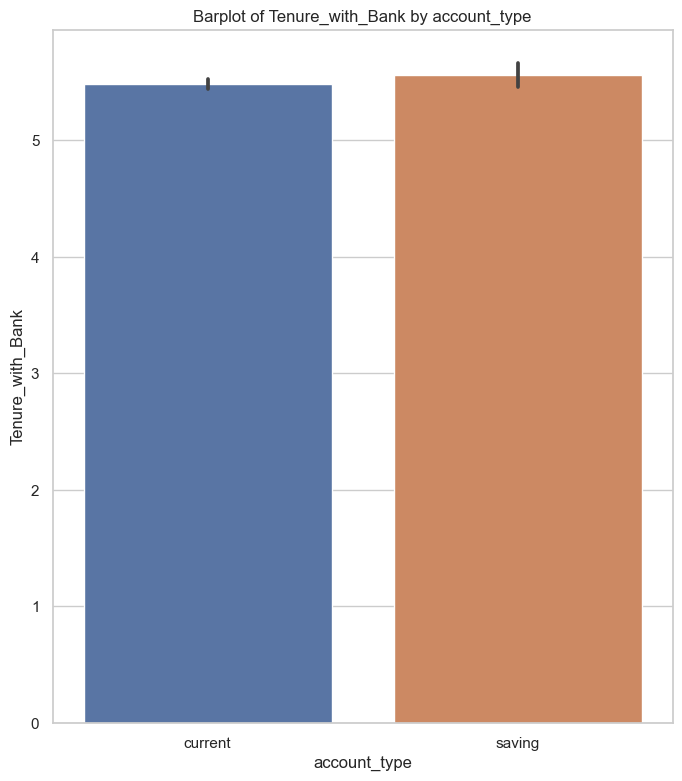

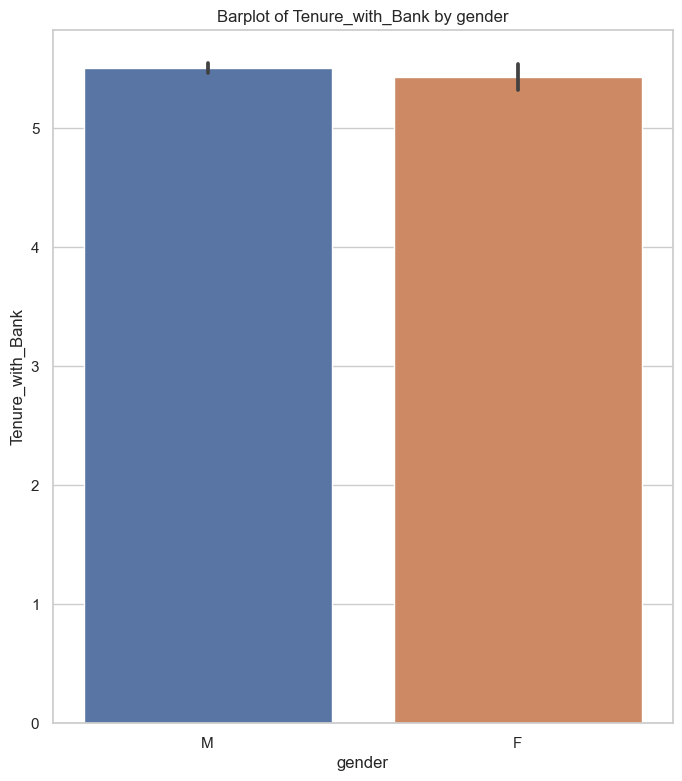

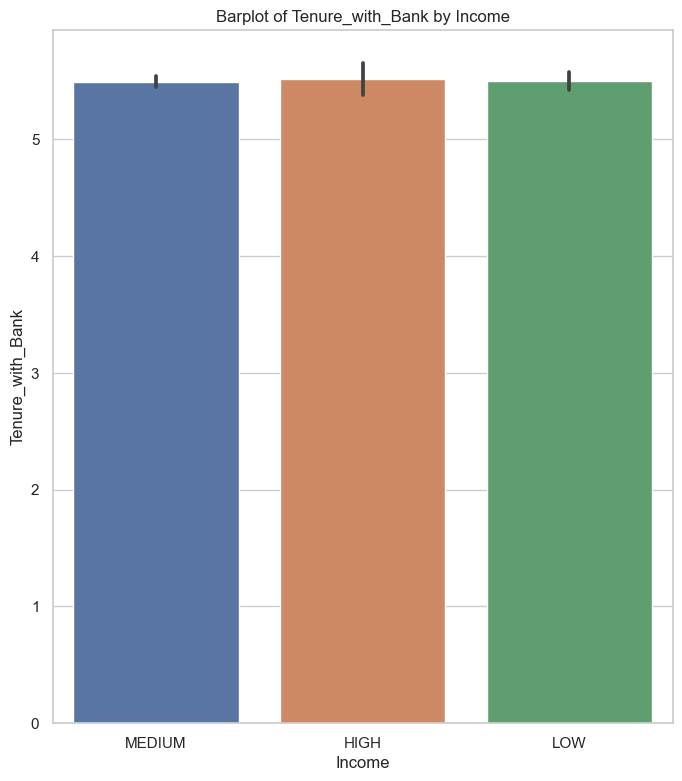

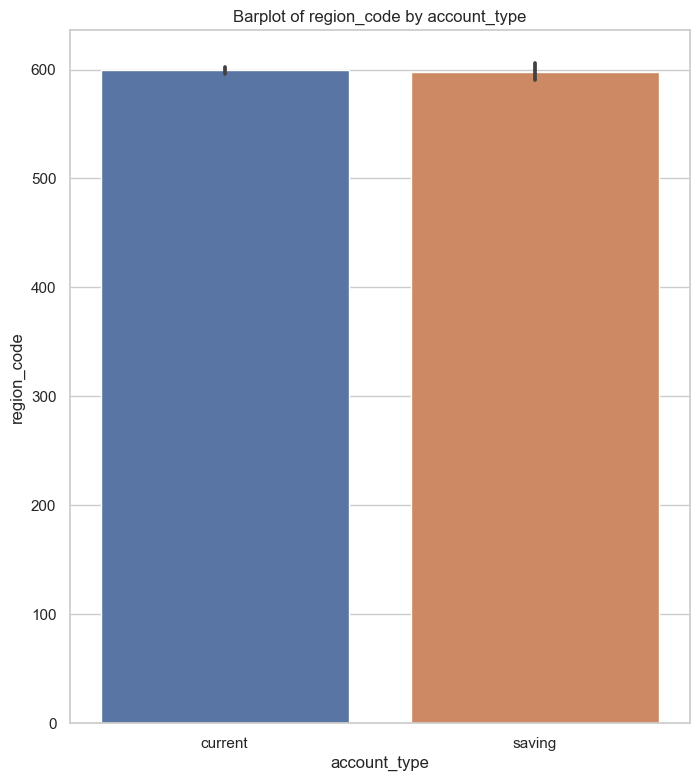

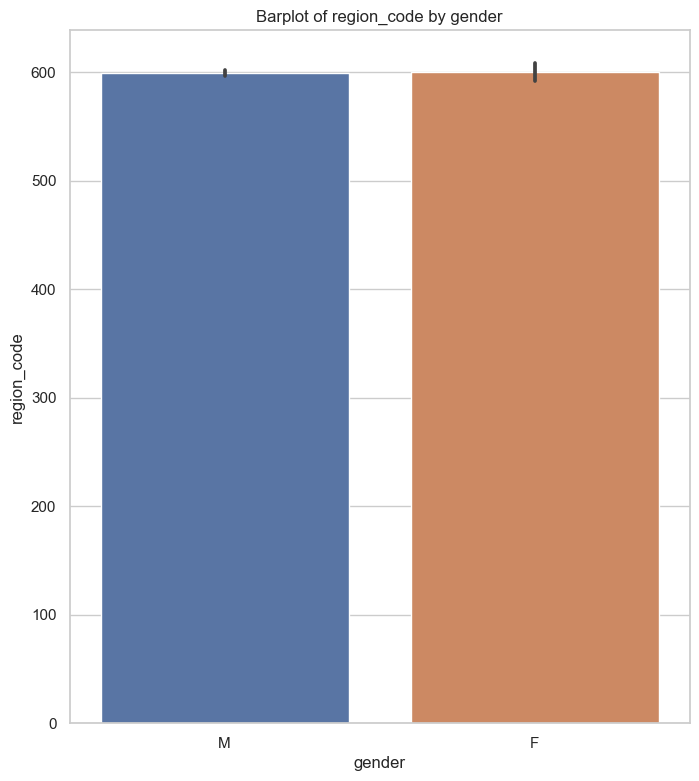

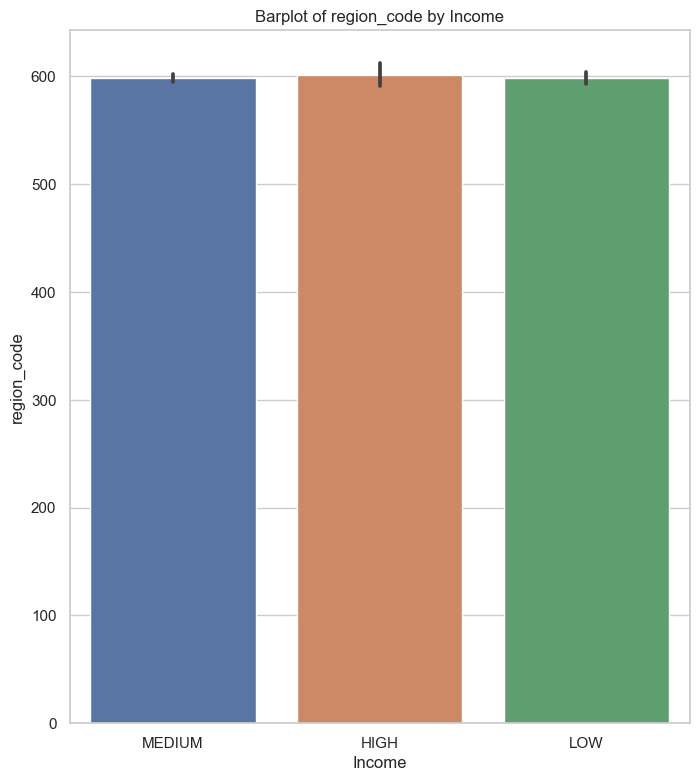

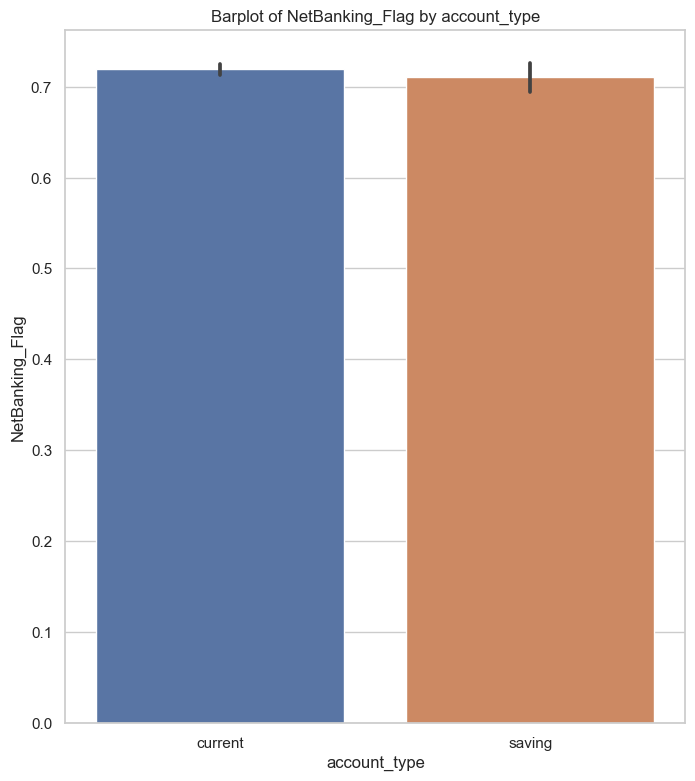

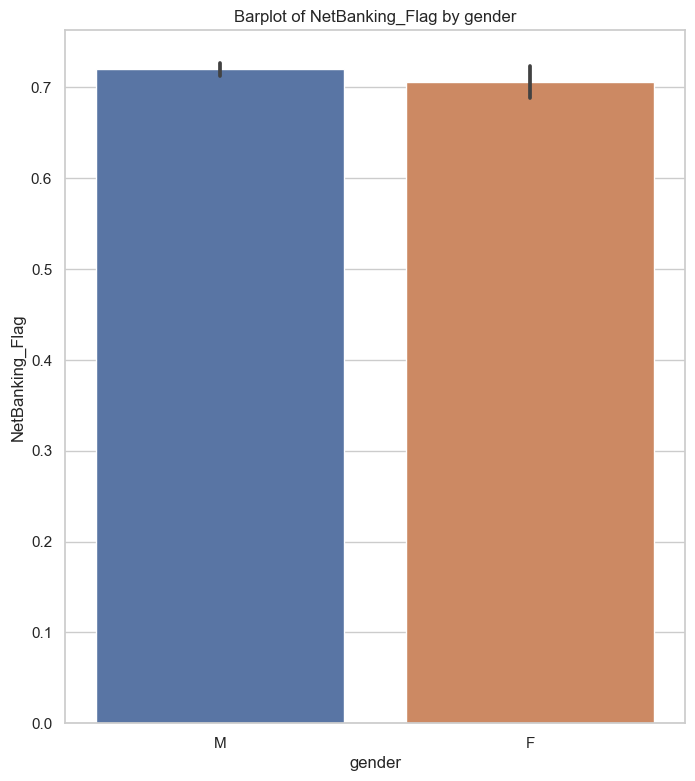

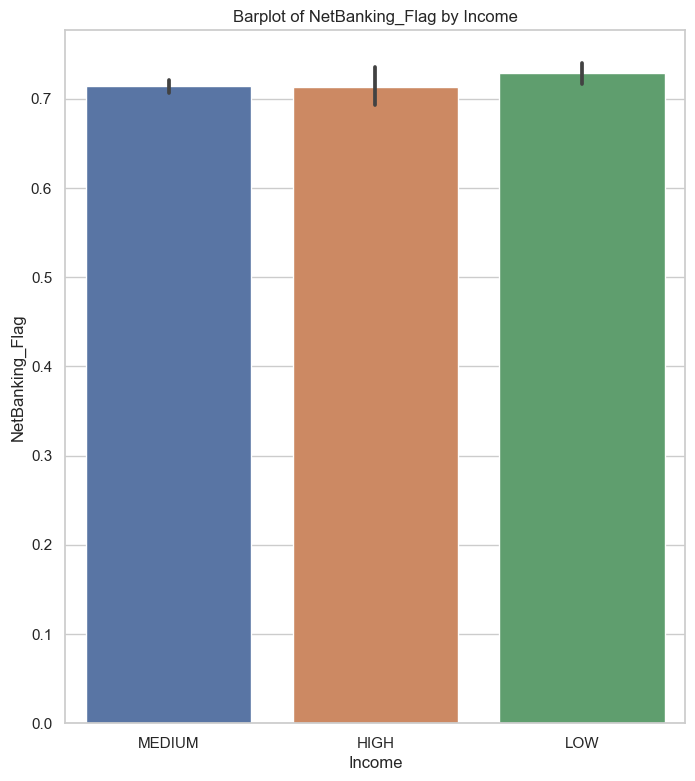

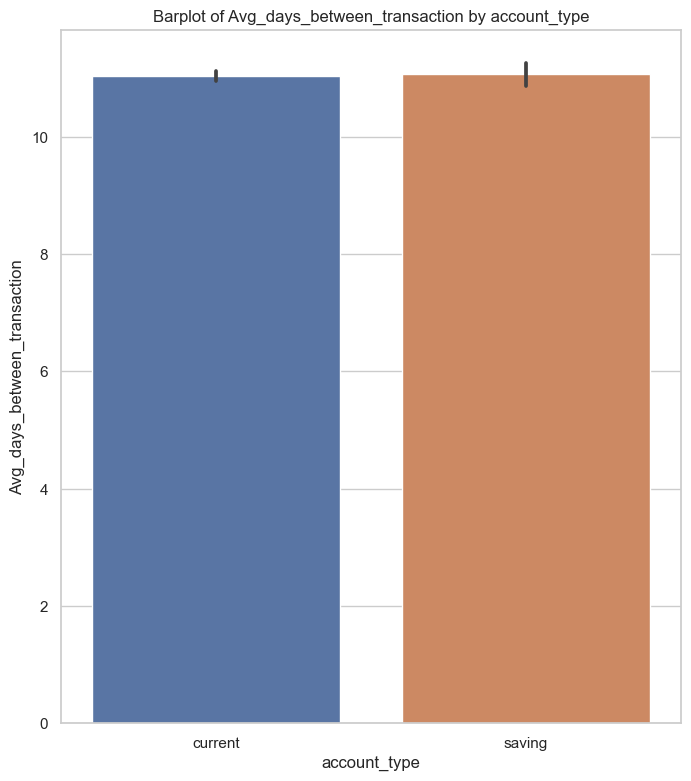

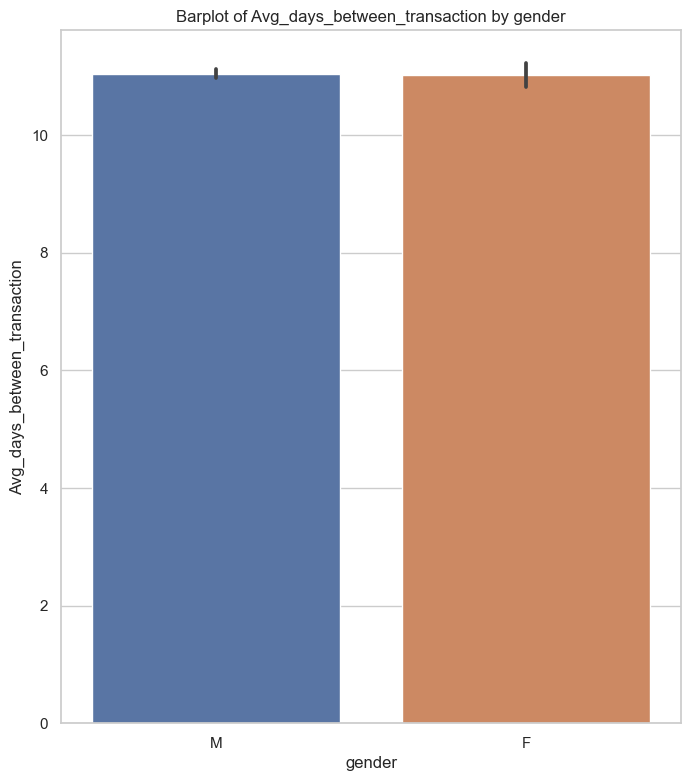

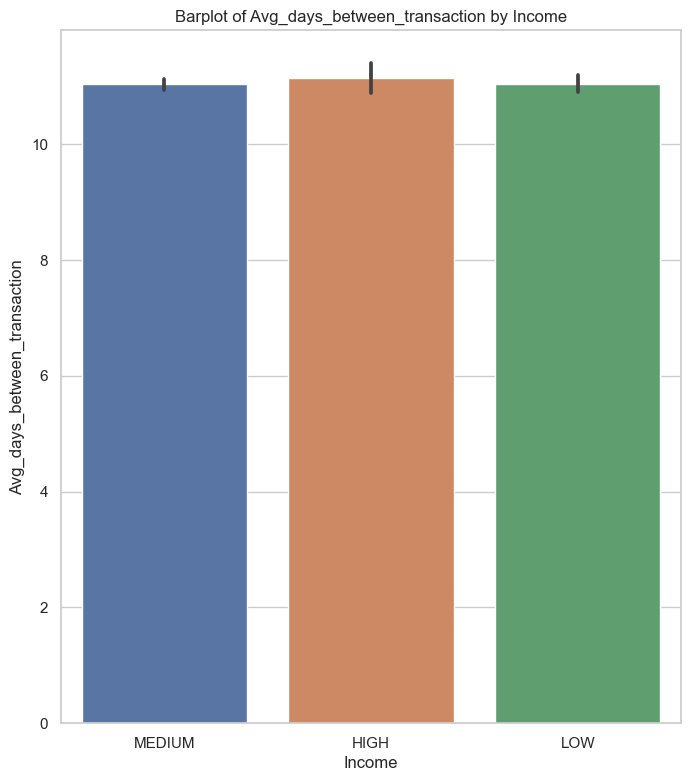

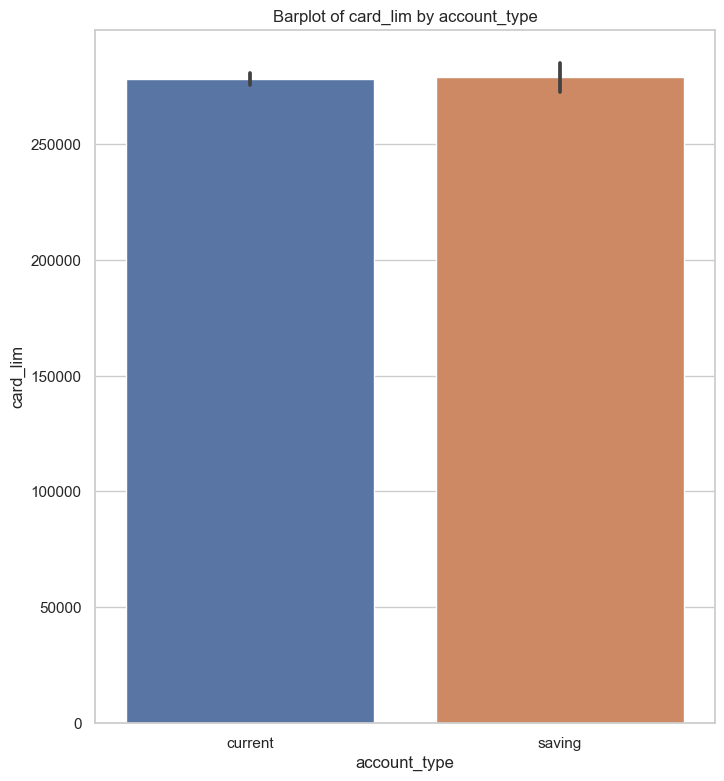

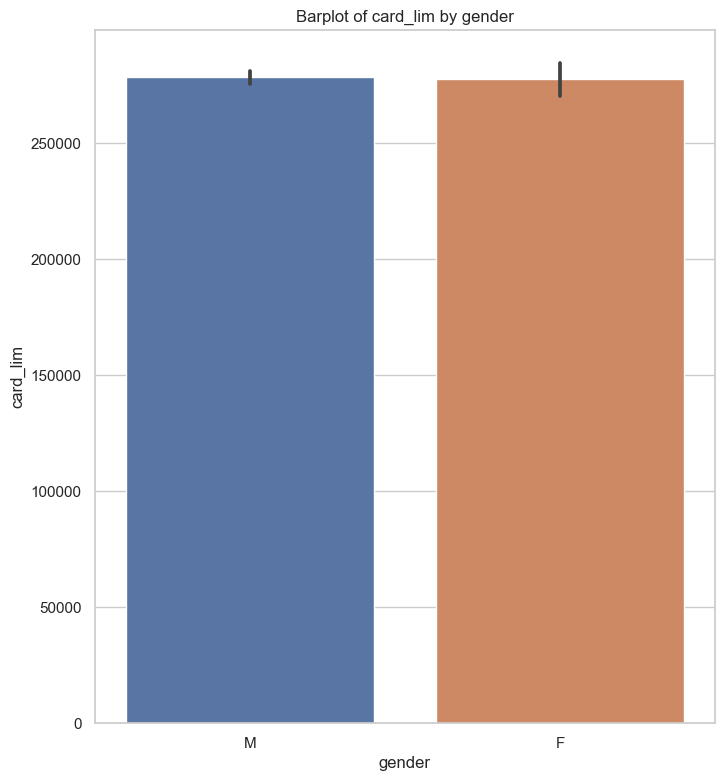

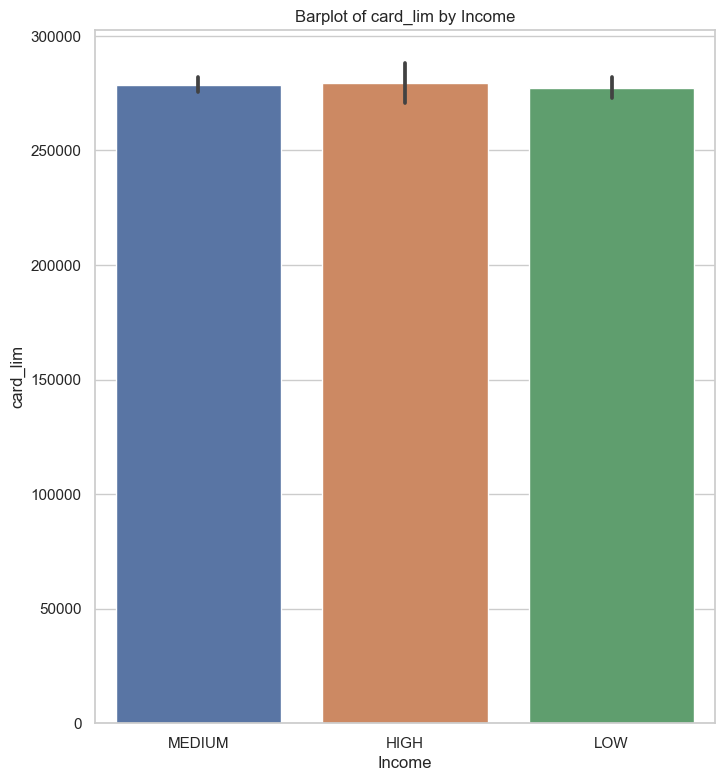

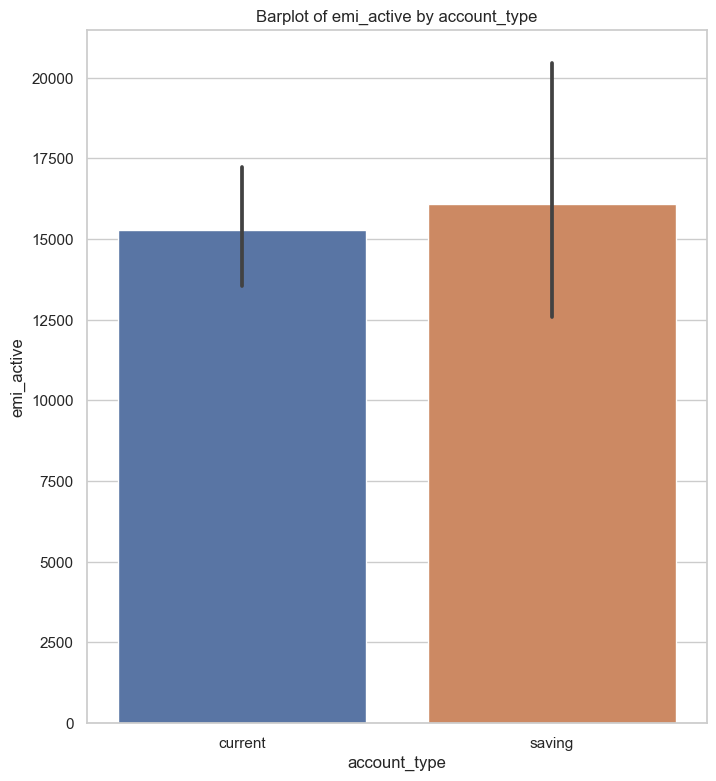

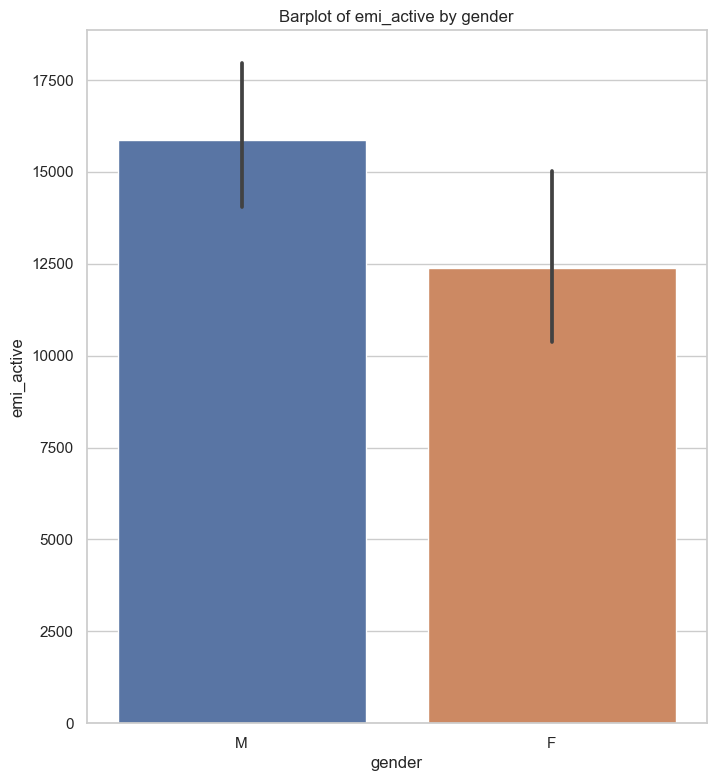

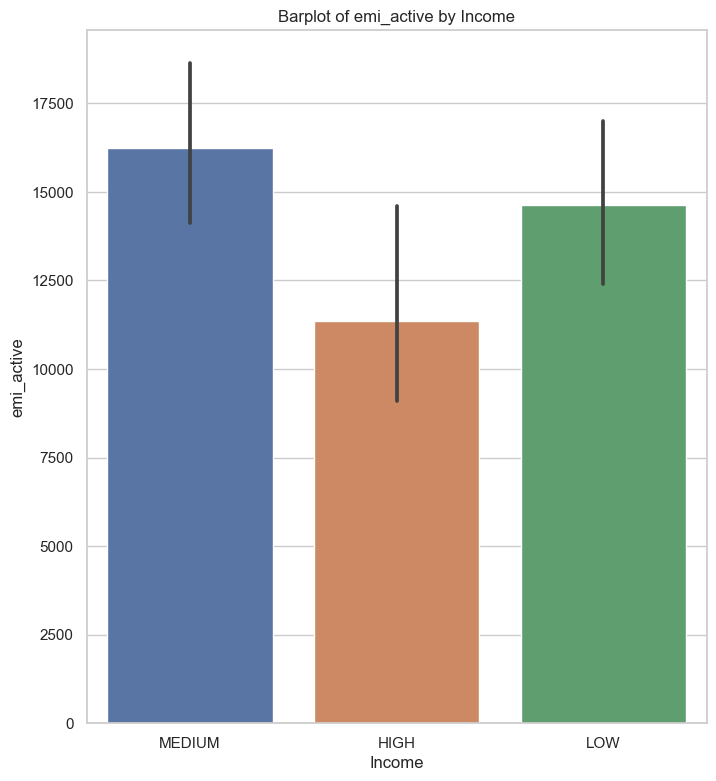

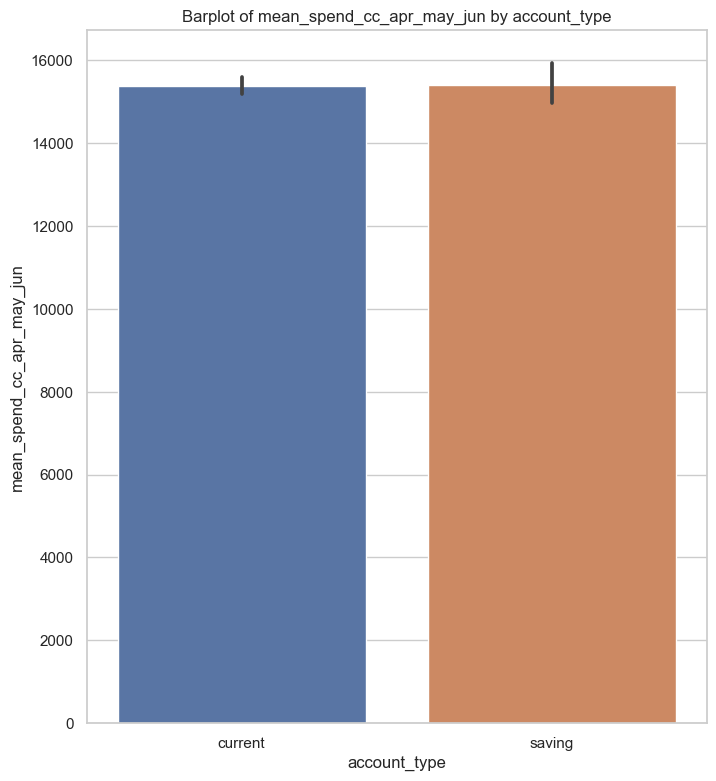

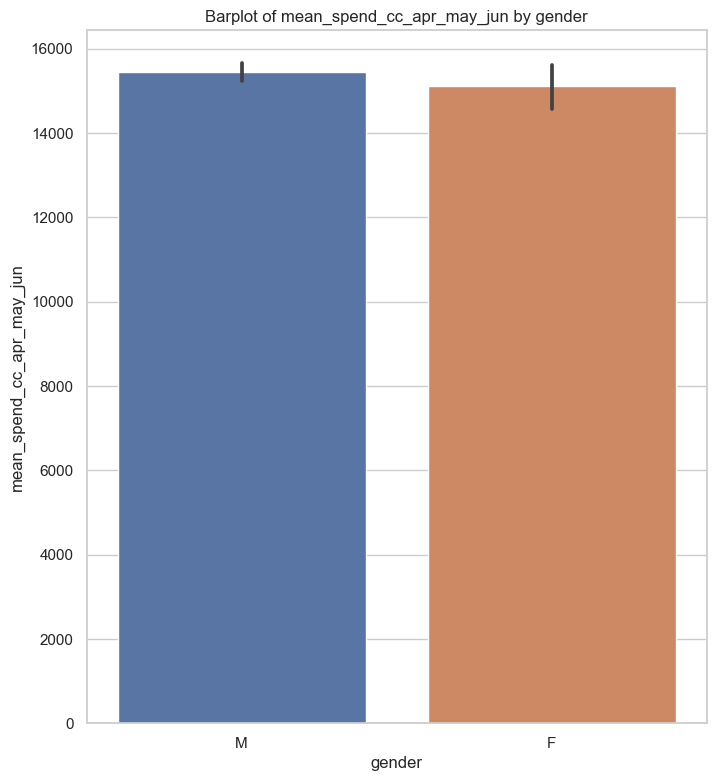

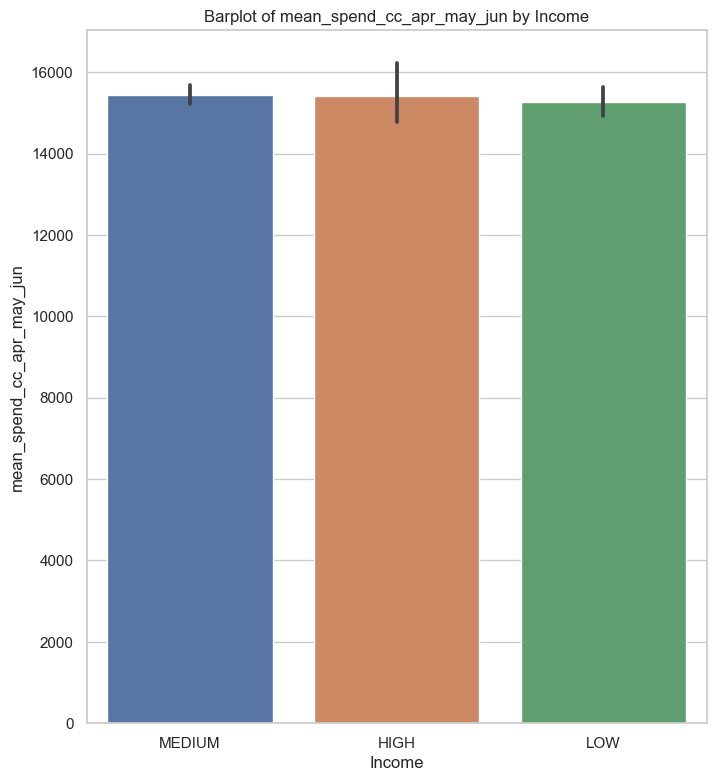

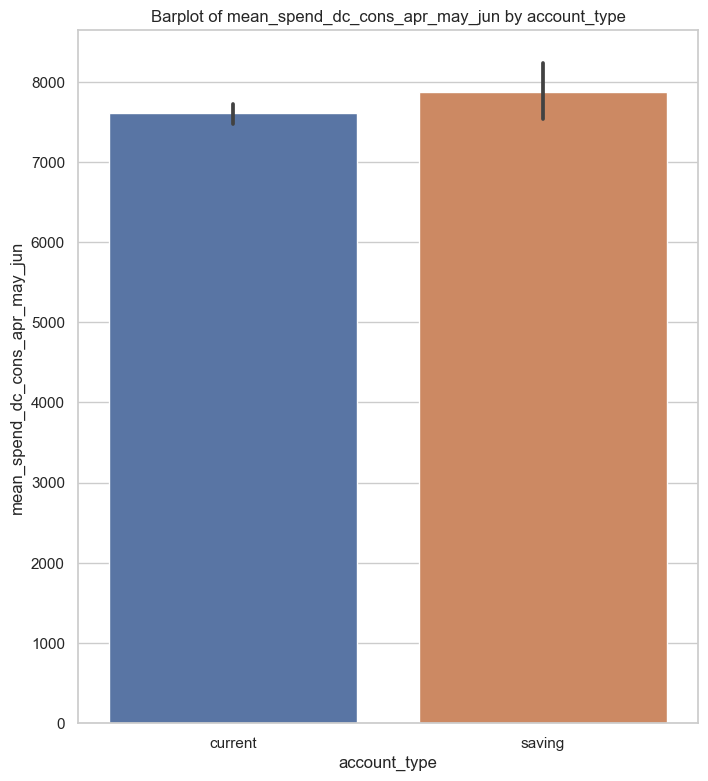

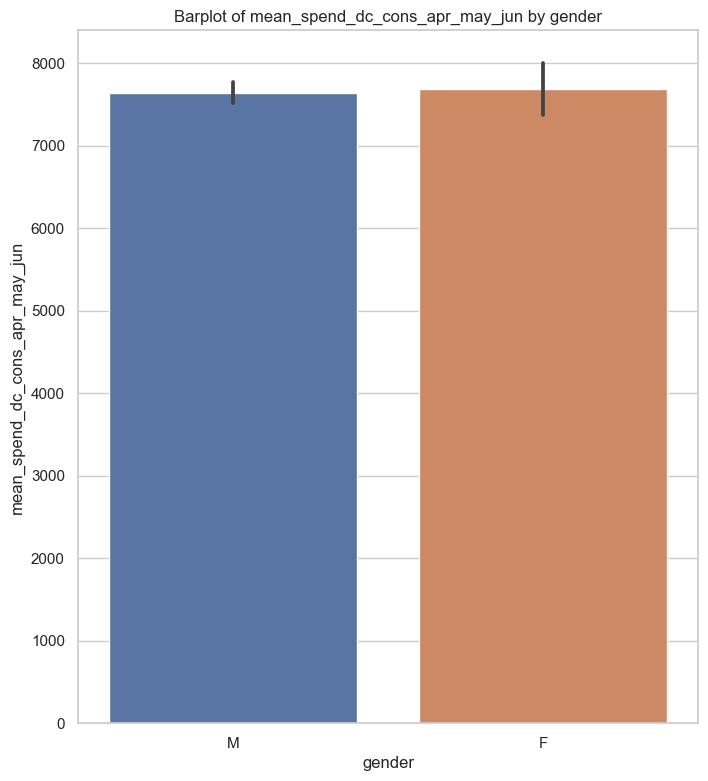

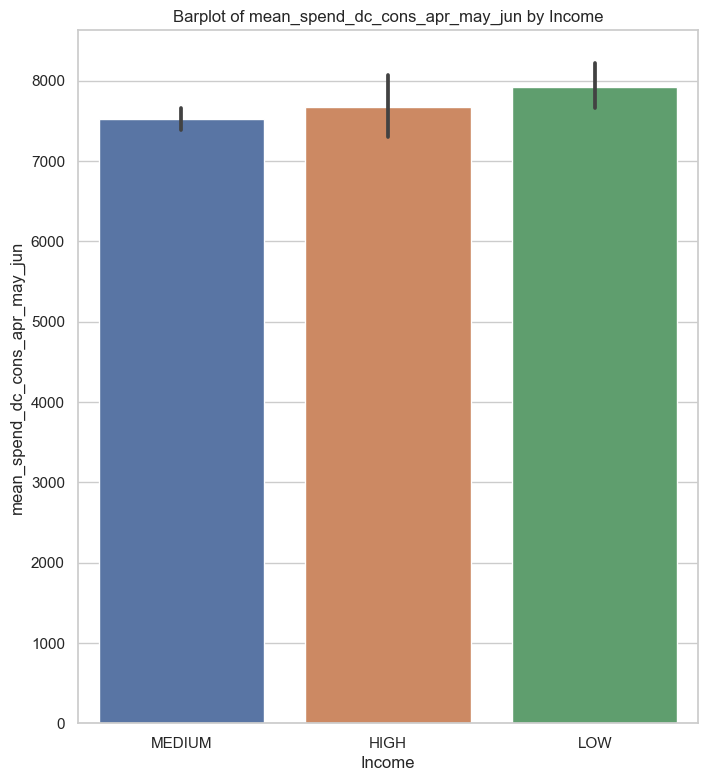

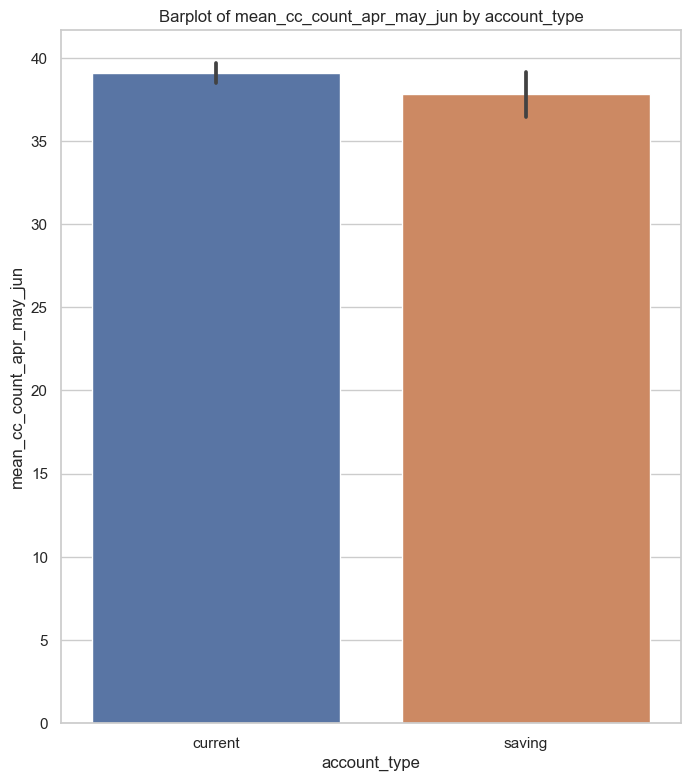

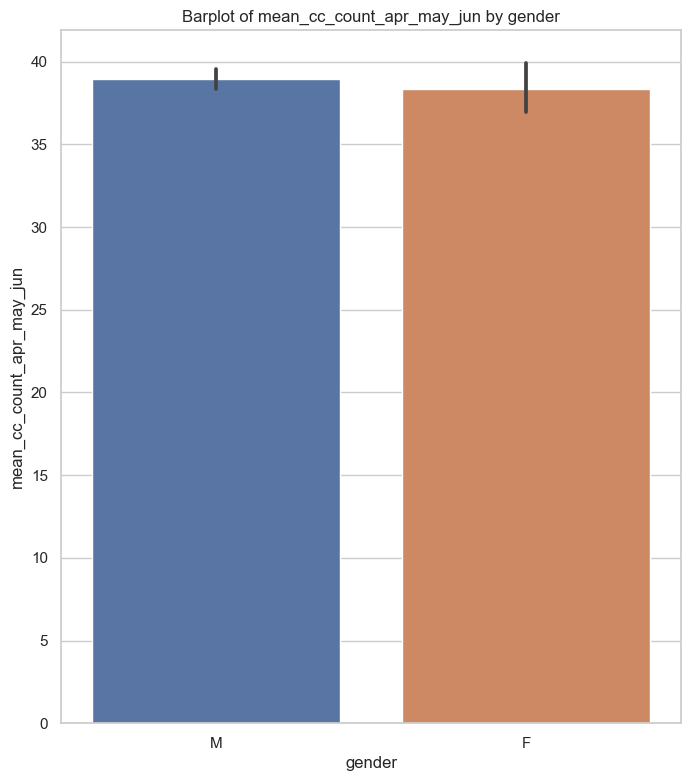

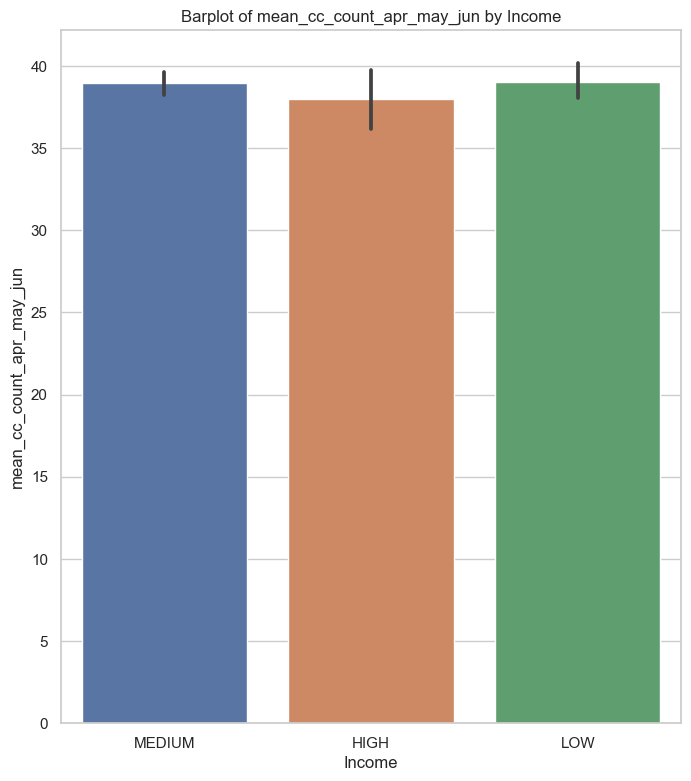

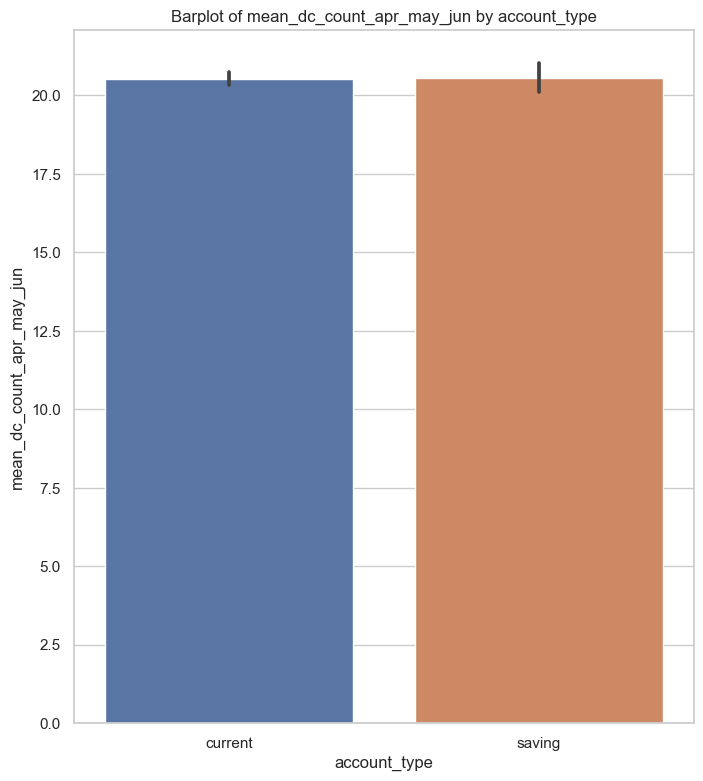

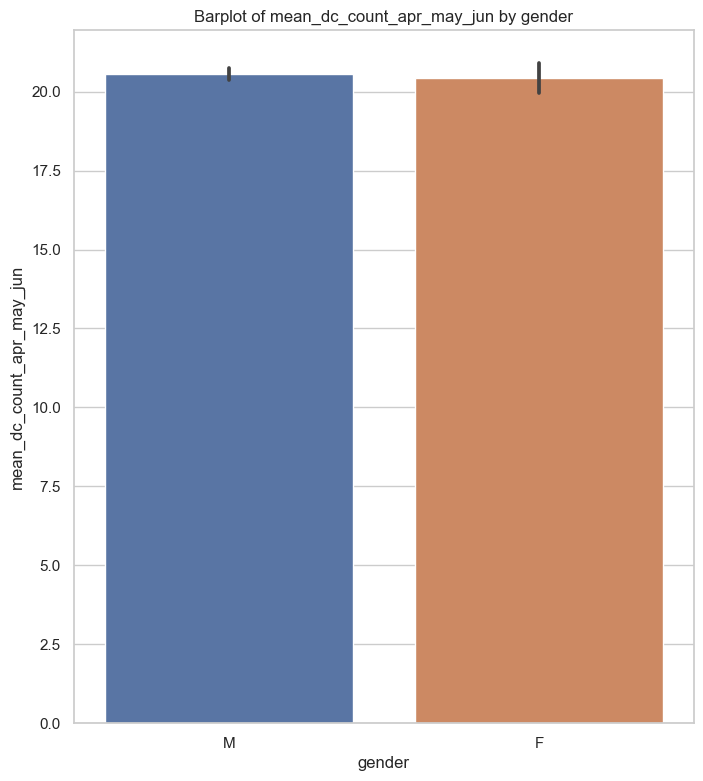

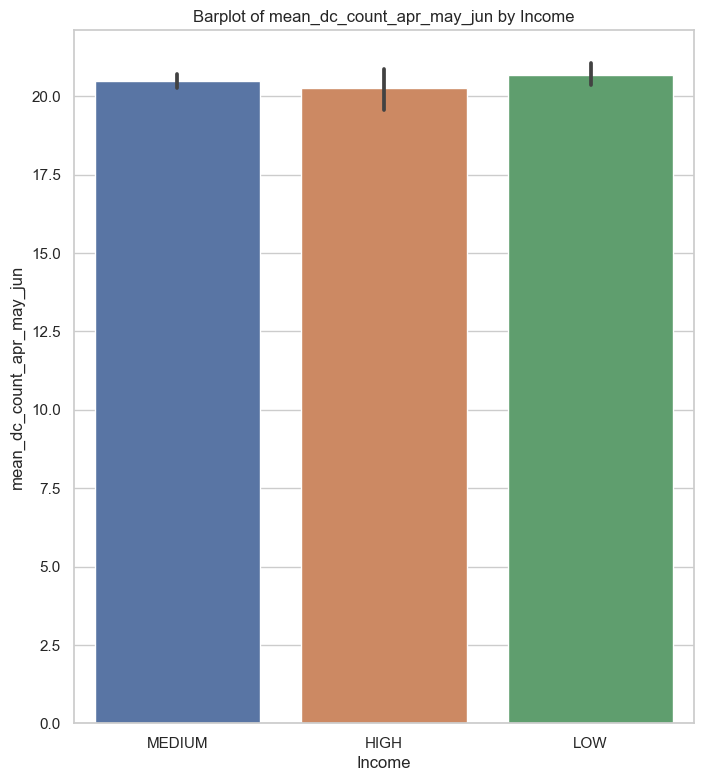

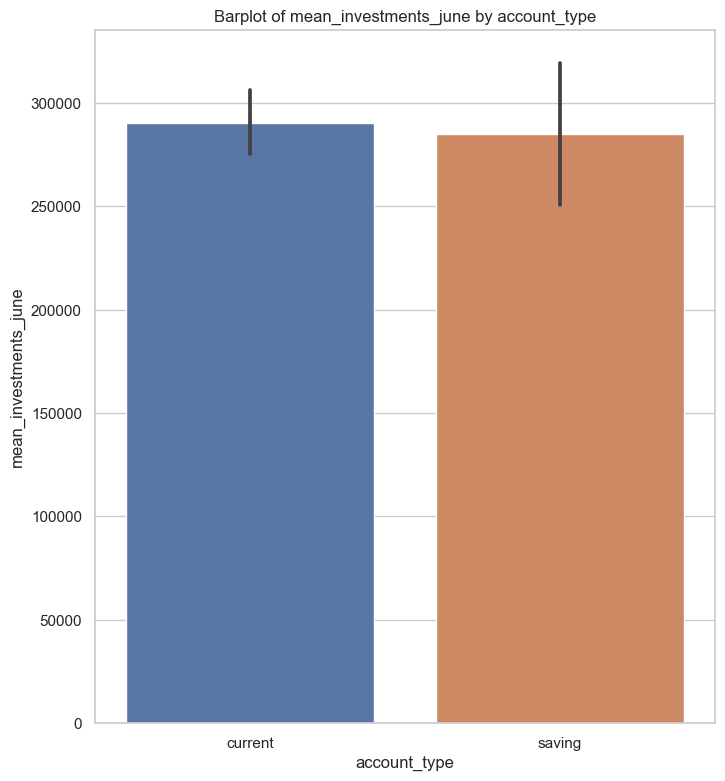

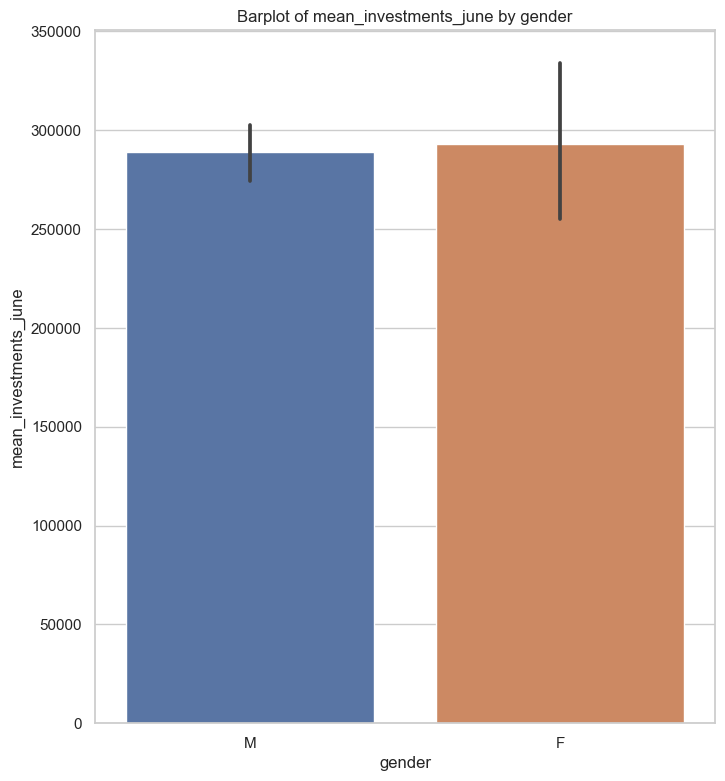

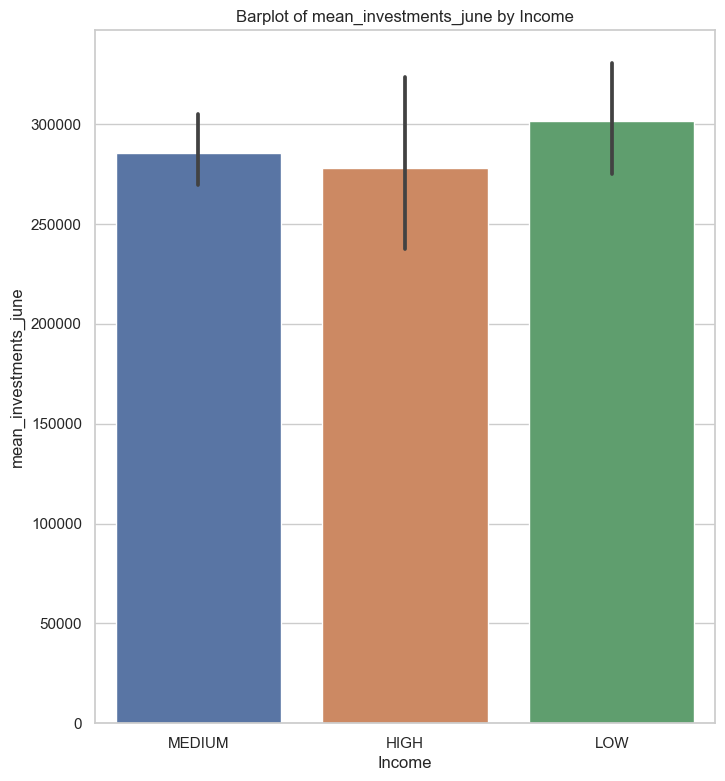

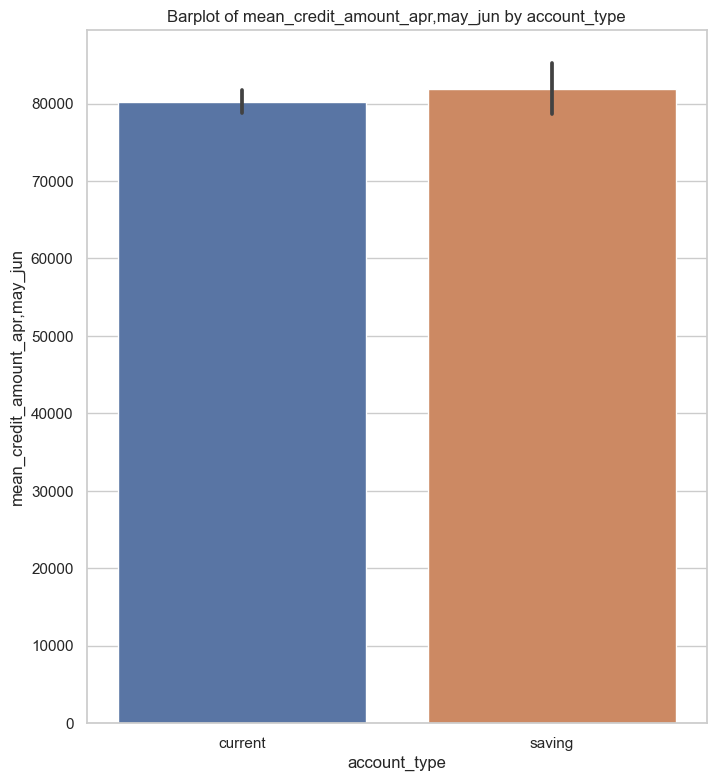

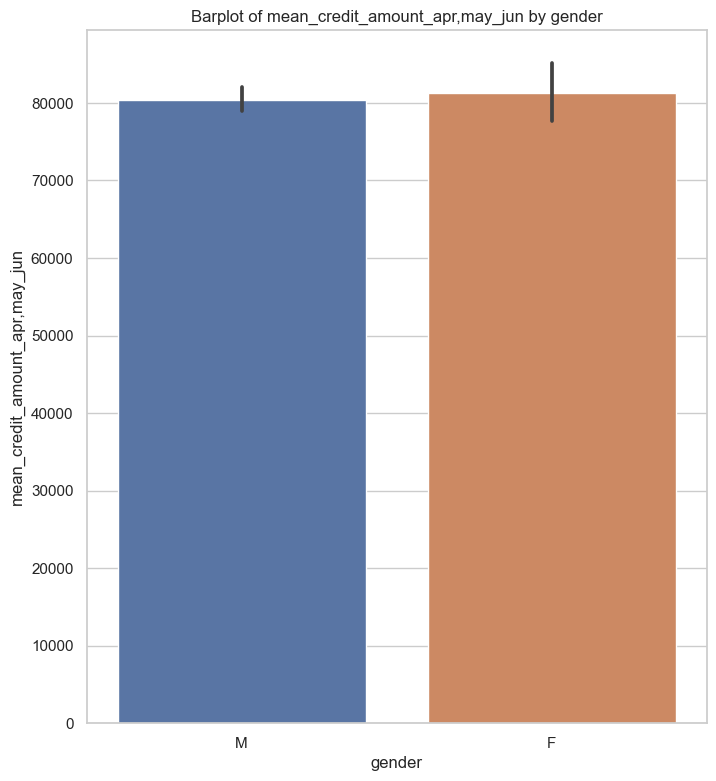

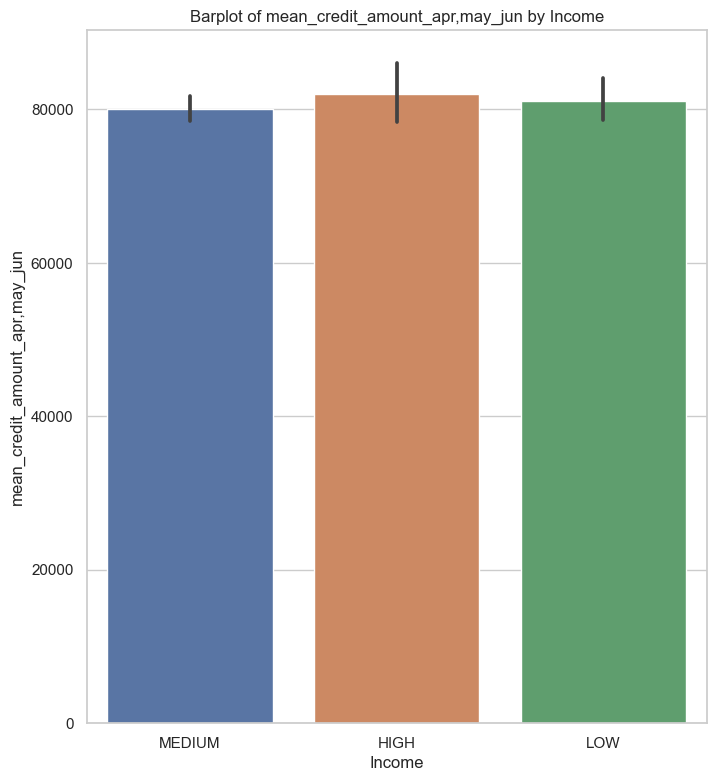

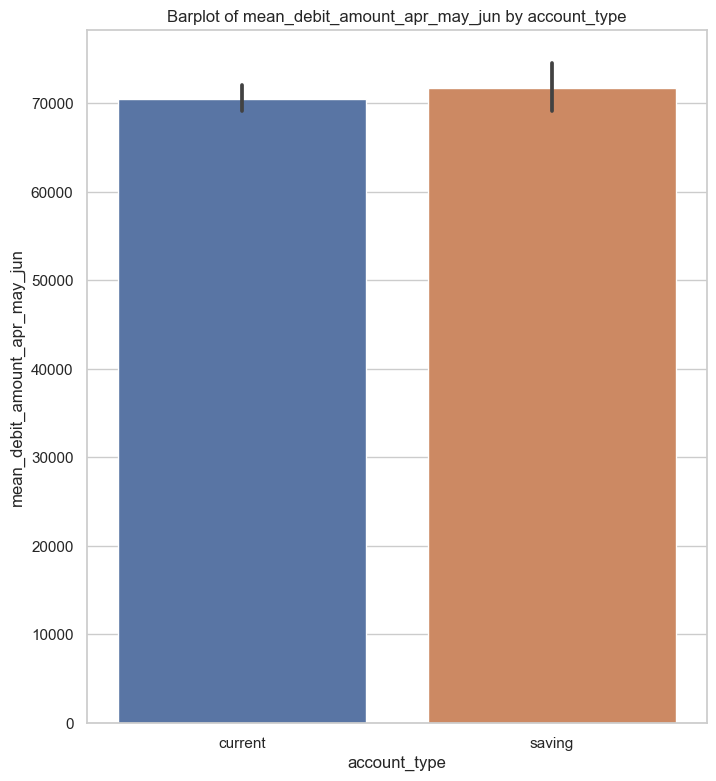

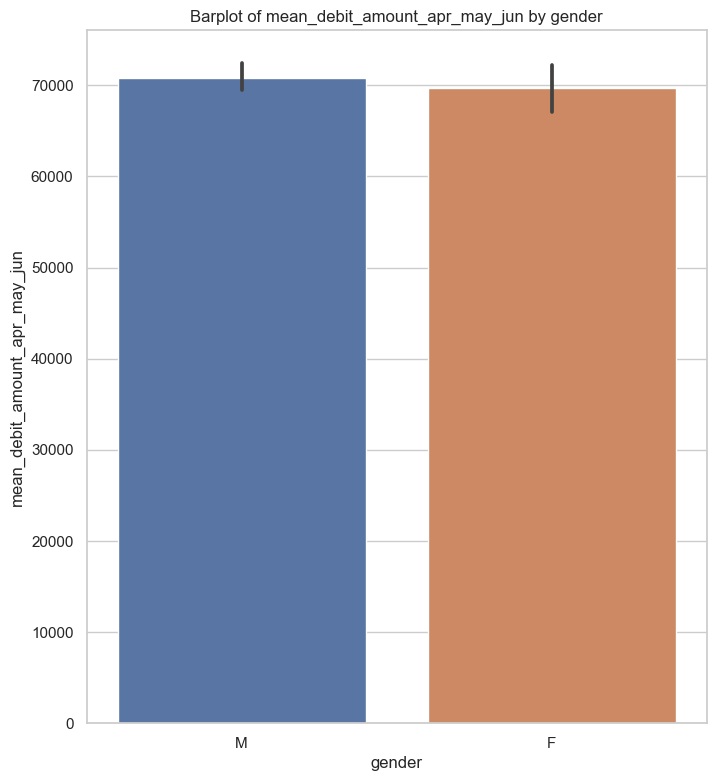

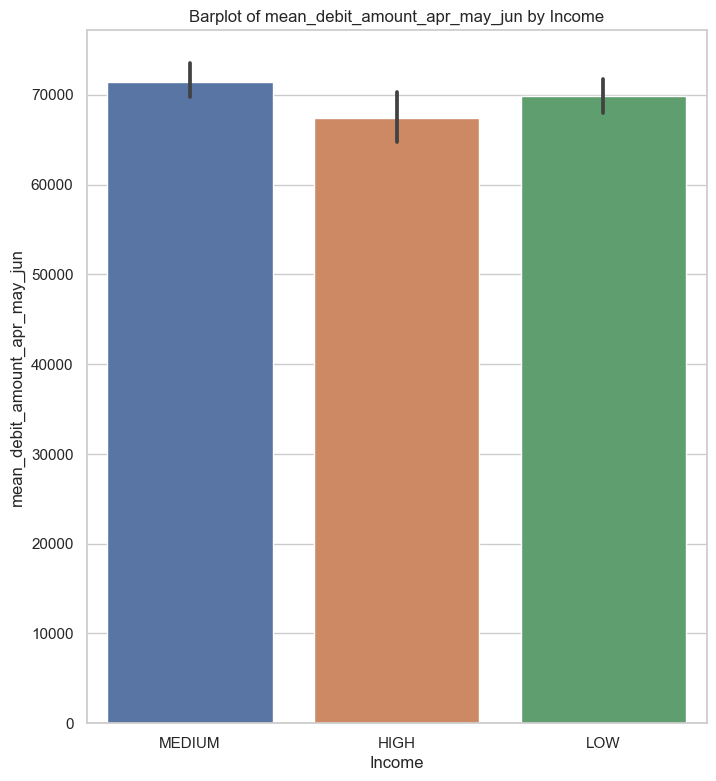

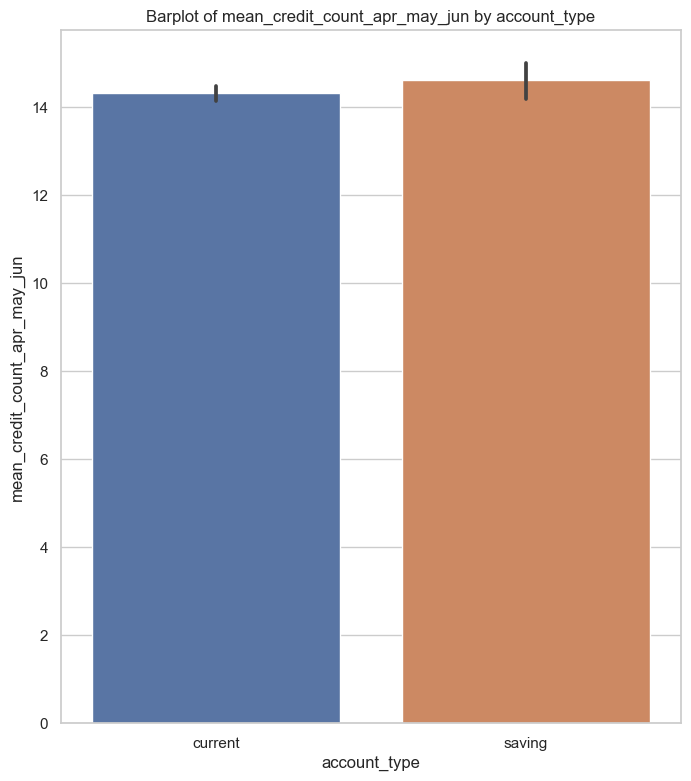

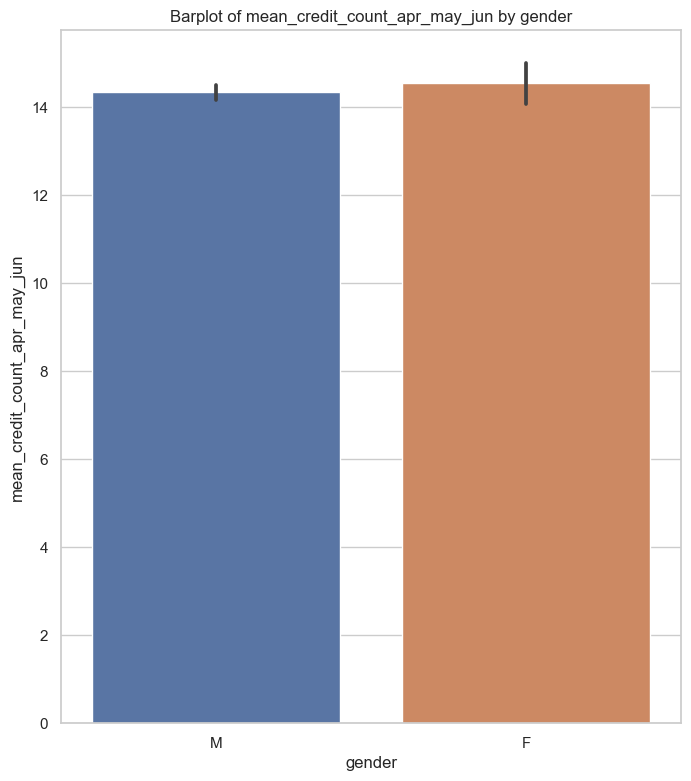

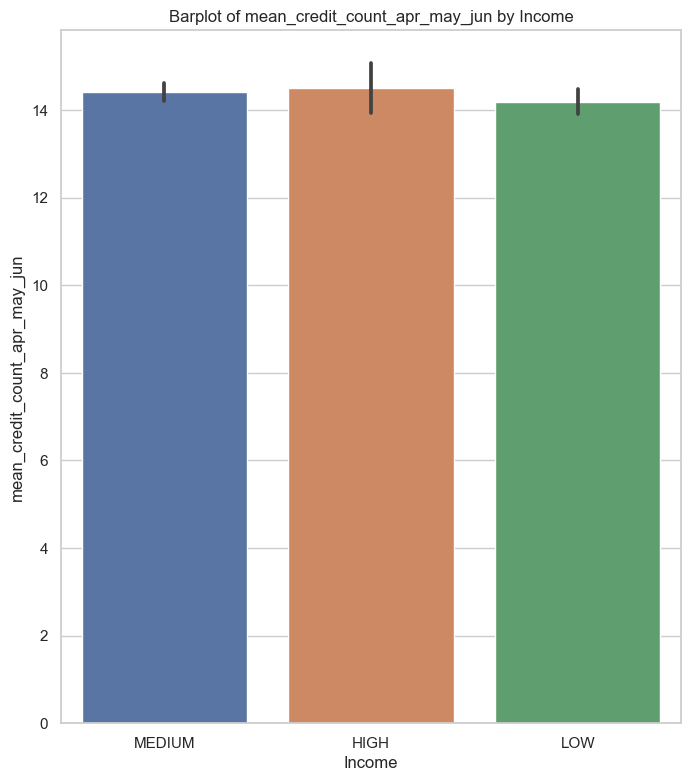

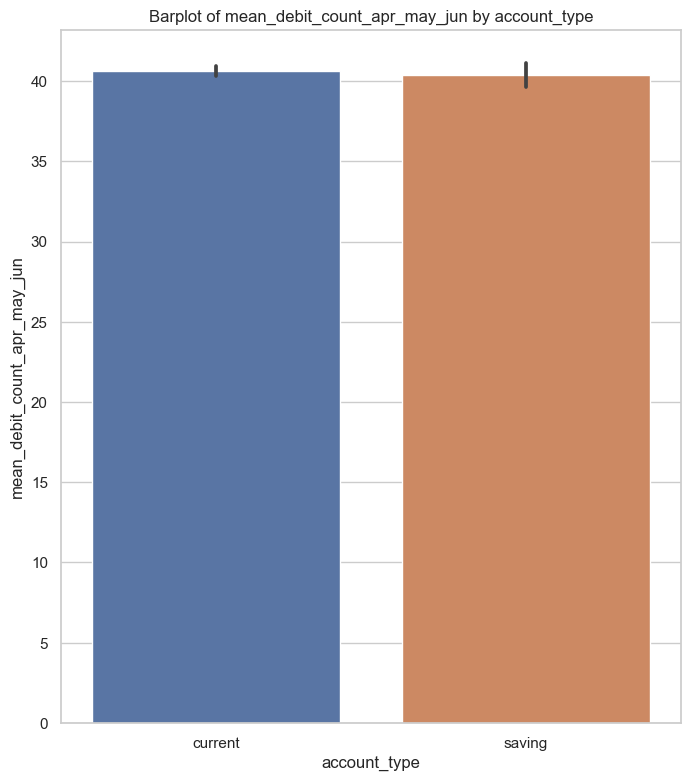

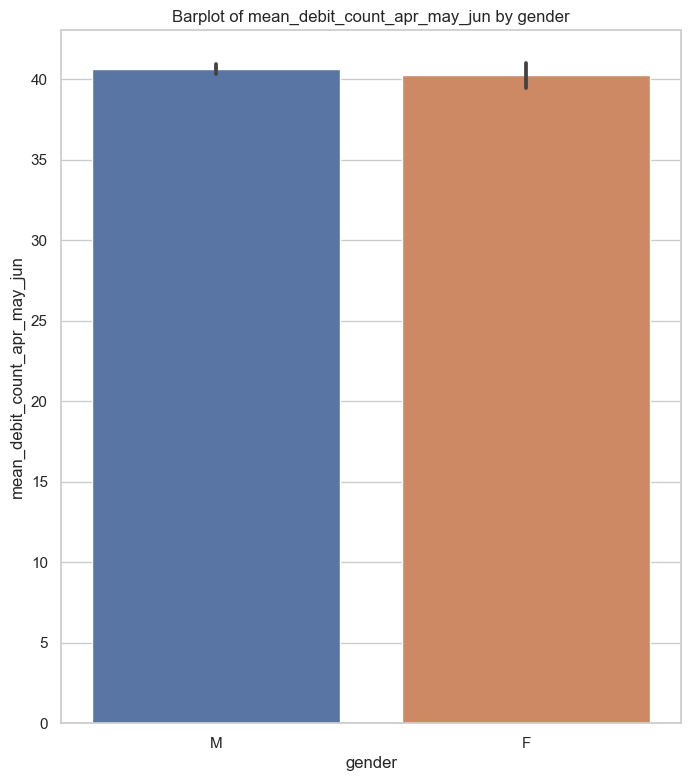

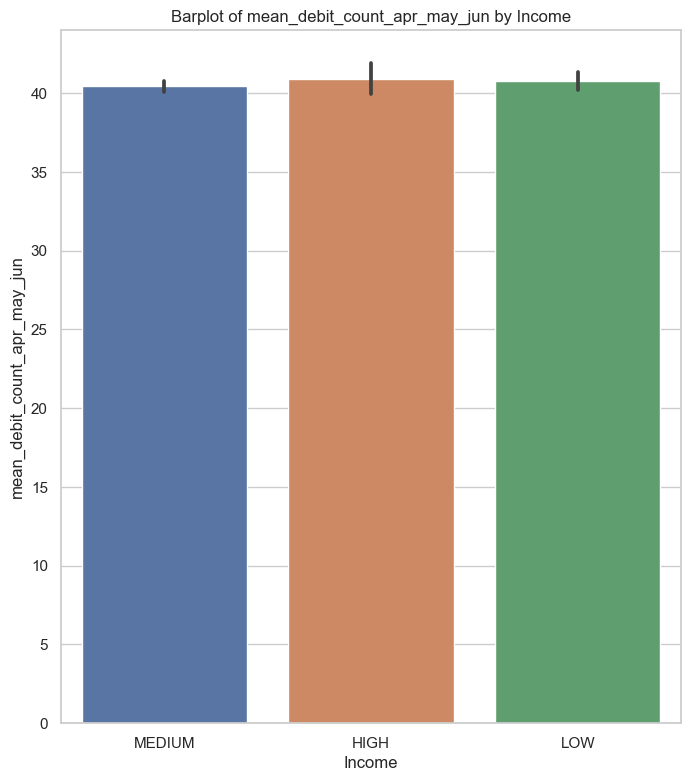

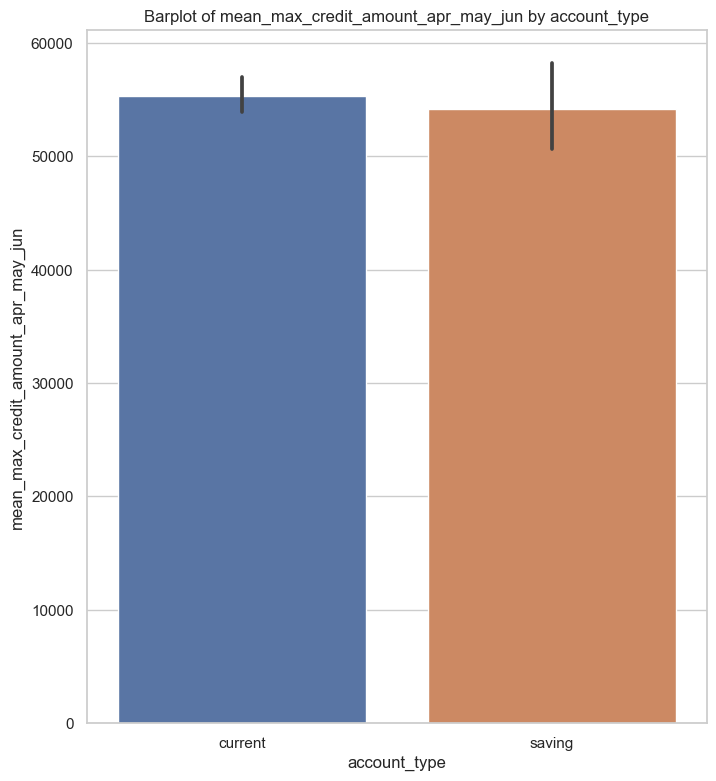

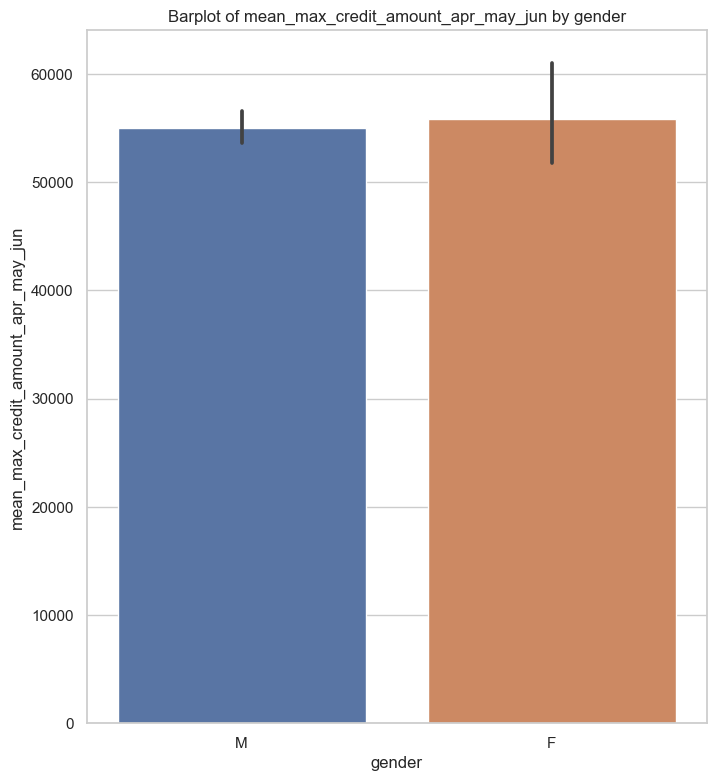

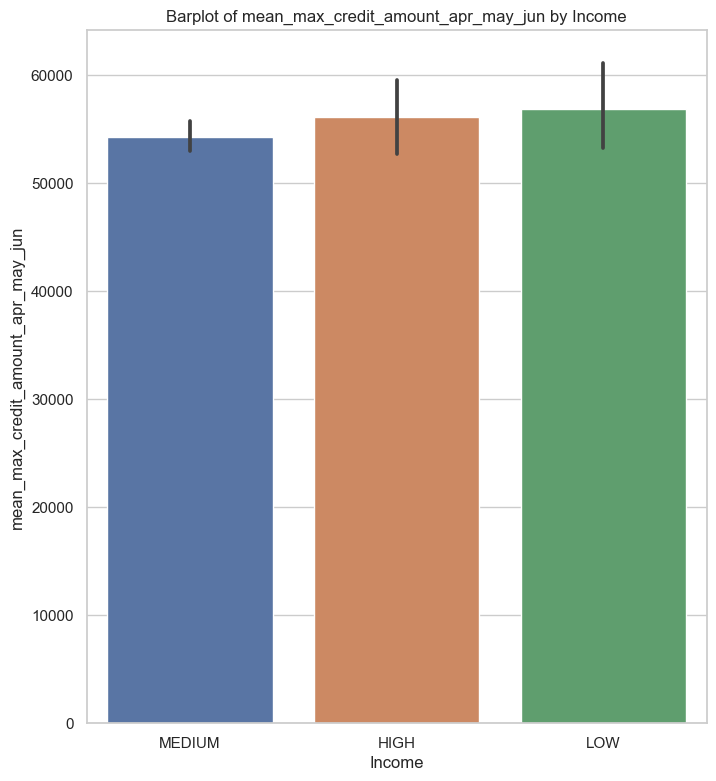

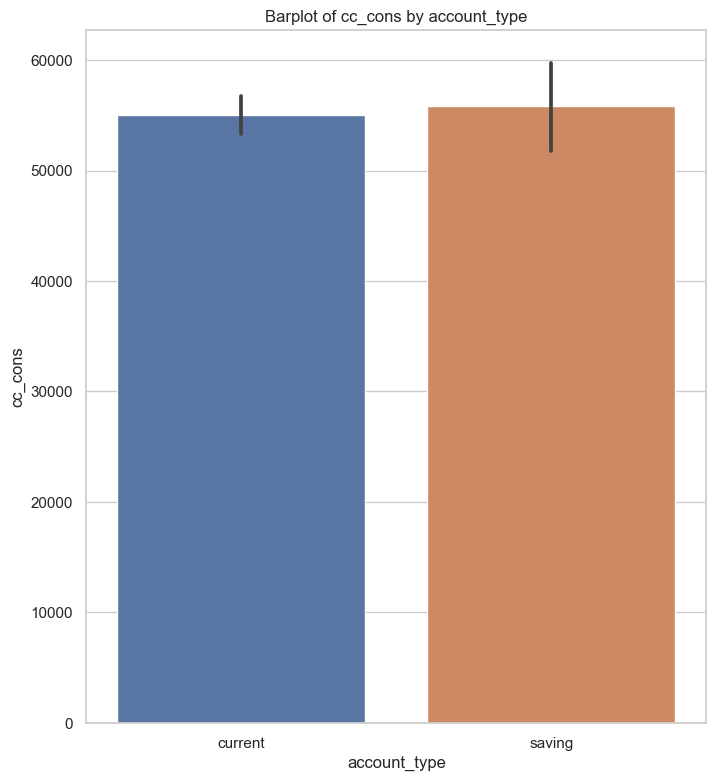

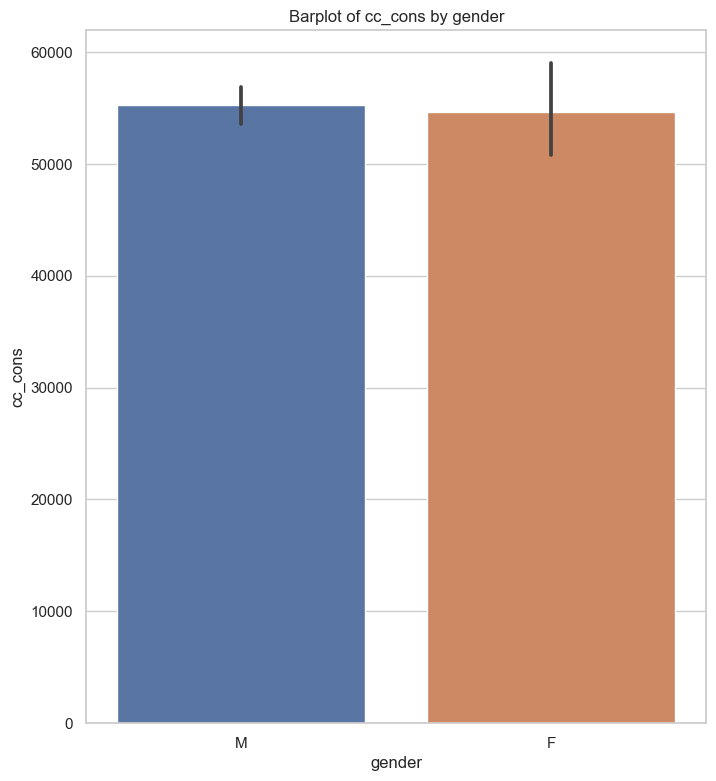

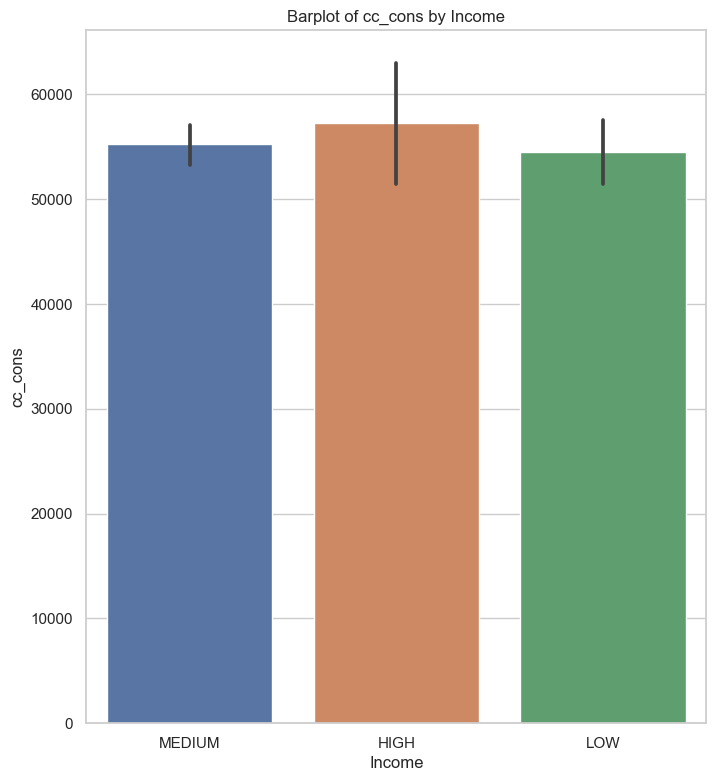

In [143]:
numerical_columns = final_df.select_dtypes('number').columns
for numerical_column in numerical_columns:
    for categorical_column in obj_old_df.columns:
        if numerical_column != categorical_column:
            plt.figure(figsize=(8, 9))
            sns.barplot(x=categorical_column, y=numerical_column, data=final_df)
            plt.title(f'Barplot of {numerical_column} by {categorical_column}')
            plt.show()

## Numeric vs Numeric Relationships

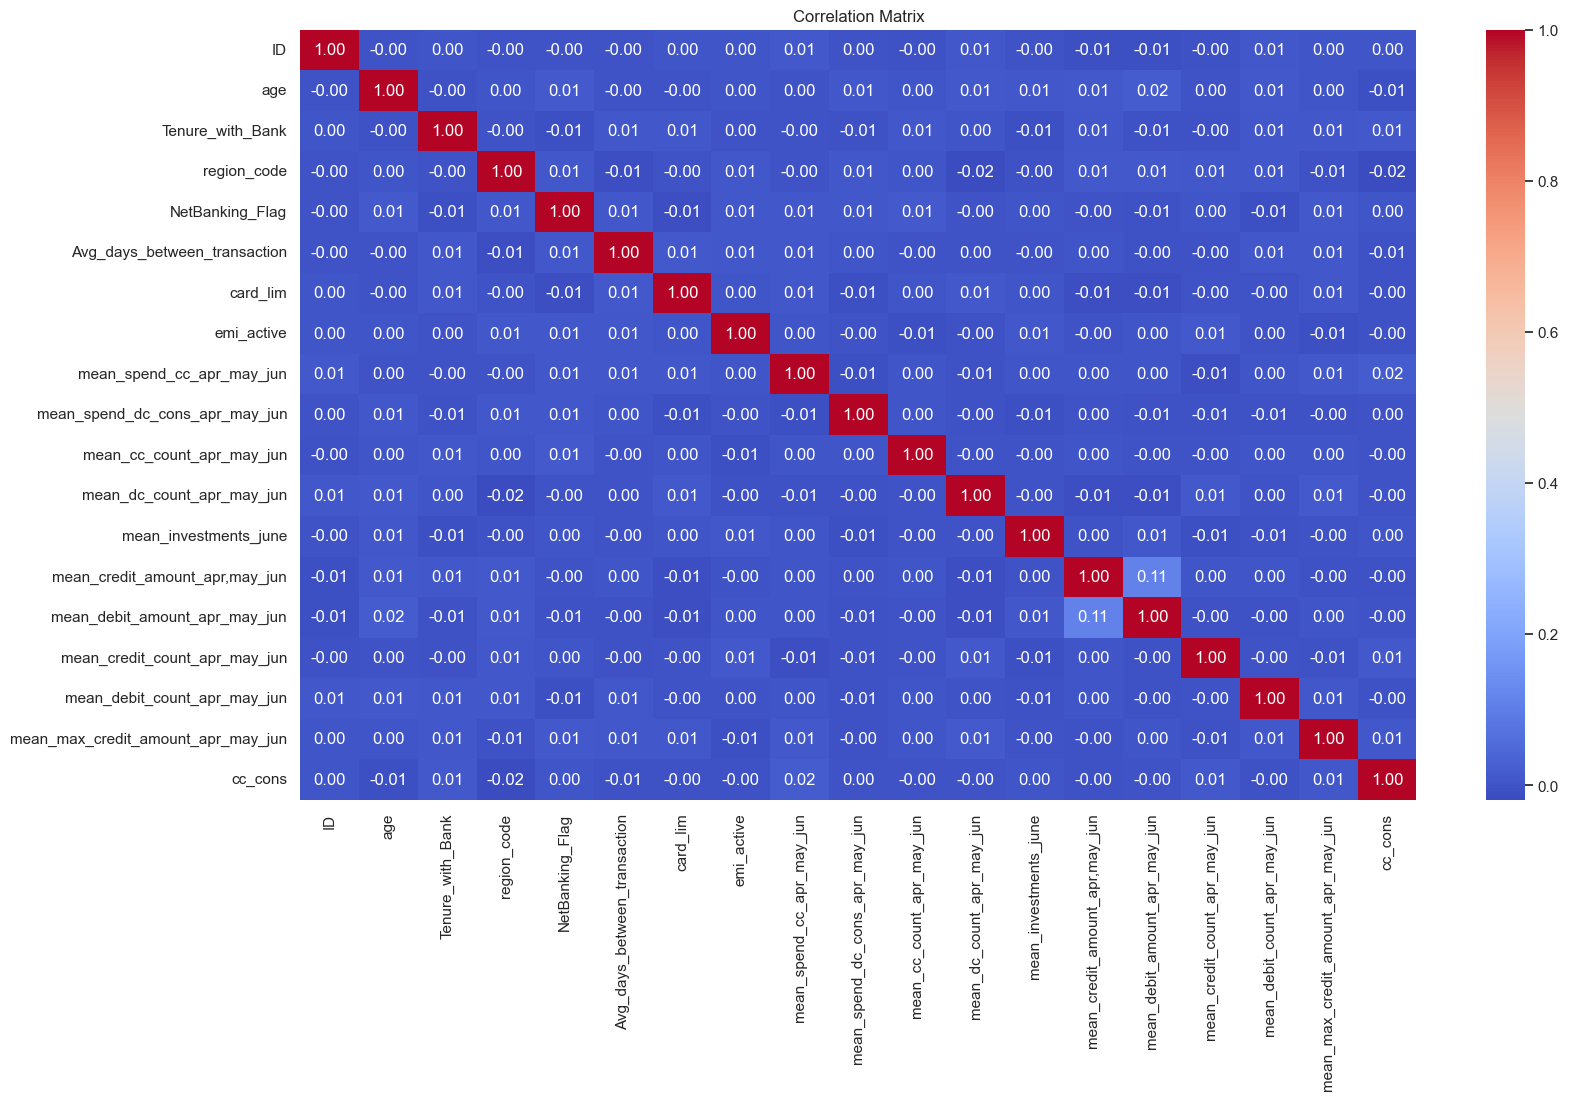

In [144]:
num_old_df=final_df.select_dtypes(exclude='object').columns
correlation_matrix = final_df[num_old_df].corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## categorical variables vs categorical variables

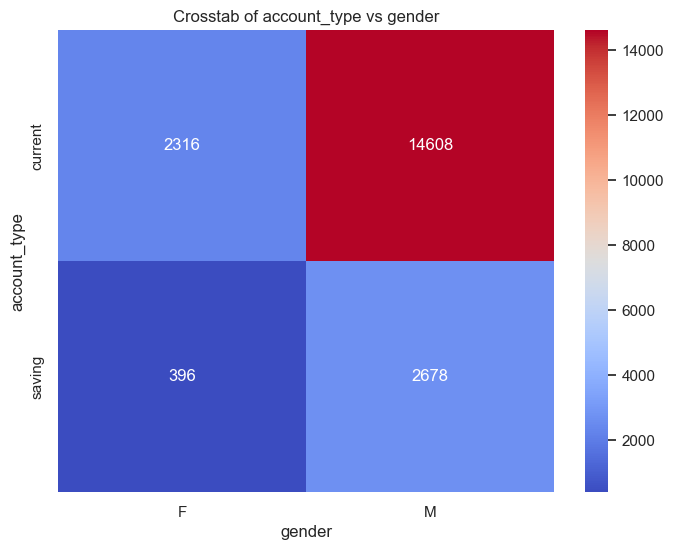

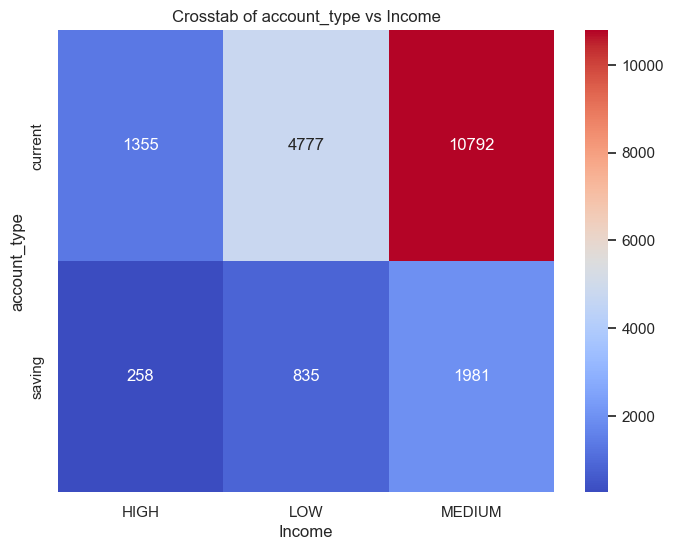

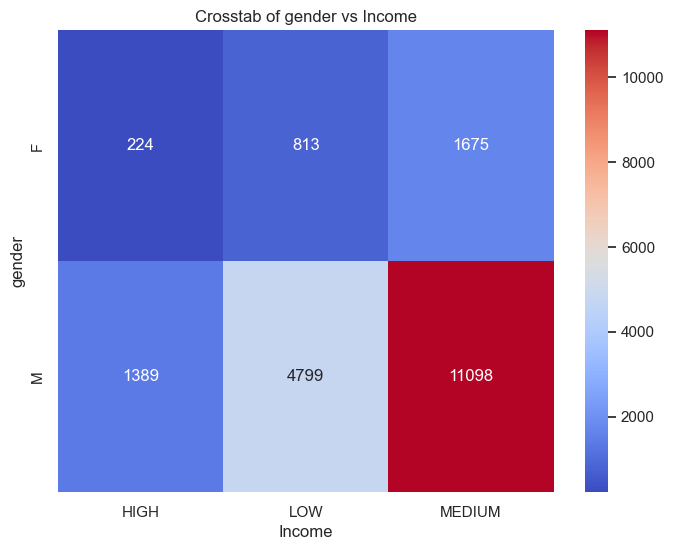

In [145]:
# Create a set to keep track of plotted combinations
plotted_combinations = set()

for i in obj_old_df:
    for j in obj_old_df:
        # Check if the combination has been plotted before in either order
        if (i, j) not in plotted_combinations and (j, i) not in plotted_combinations and i != j:
            crosstab_table = pd.crosstab(obj_old_df[i], obj_old_df[j])
            
            plt.figure(figsize=(8, 6))
            sns.heatmap(crosstab_table, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f'Crosstab of {i} vs {j}')
            plt.show()
            
            # Add the combination to the set
            plotted_combinations.add((i, j))

# Note: The condition i != j is added to avoid self-comparisons

#

## checking Outliers in the numericals_columns in the dataset

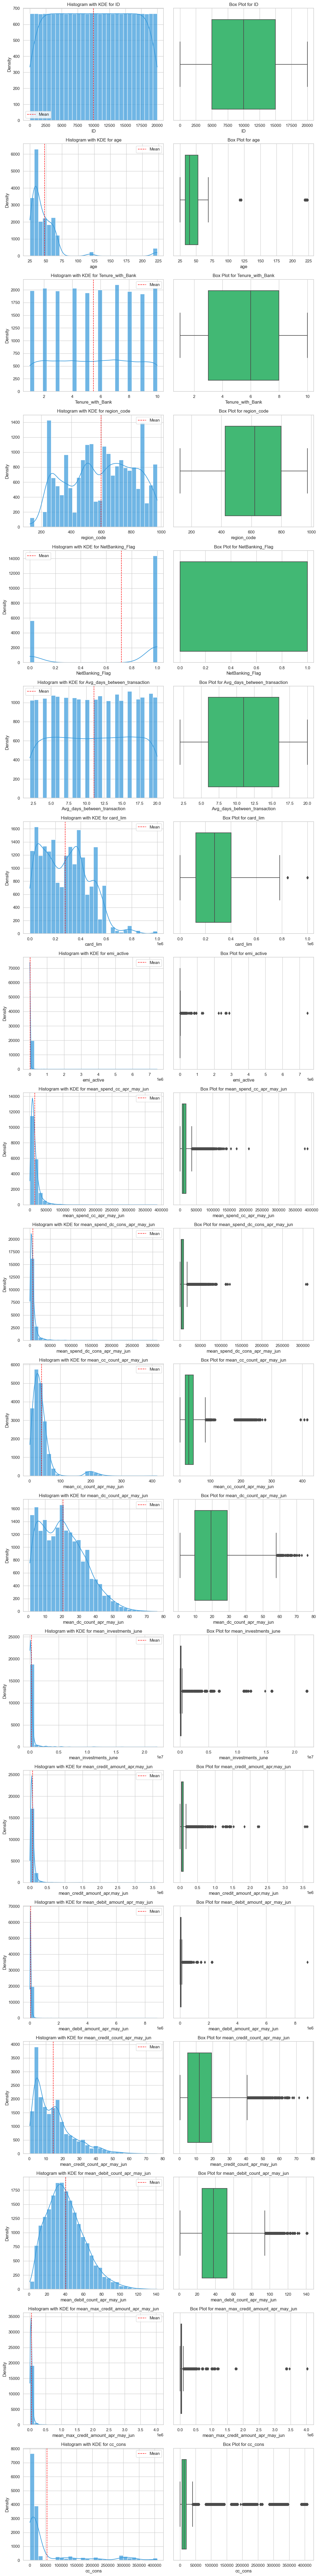

In [146]:
# Assuming dataframe is your DataFrame
numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

# Set a white grid background
sns.set(style="whitegrid")

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(12, 5 * len(numerical_columns)))

# Loop through numerical columns
for i, column in enumerate(numerical_columns):
    # Histogram on the left with KDE
    sns.histplot(data=final_df, x=column, kde=True, ax=axes[i, 0], bins=30, kde_kws={'bw_method': 0.2}, color='#3498db', alpha=0.7)  
    axes[i, 0].set_title('Histogram with KDE for {}'.format(column))
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Density')

    # Add mean line to the KDE plot
    mean_value = final_df[column].mean()
    axes[i, 0].axvline(x=mean_value, color='red', linestyle='--', linewidth=1.2, label='Mean')
    axes[i, 0].legend()

    # Box plot on the right
    sns.boxplot(data=final_df, x=column, ax=axes[i, 1], color='#2ecc71')
    axes[i, 1].set_title('Box Plot for {}'.format(column))
    axes[i, 1].set_xlabel(column)


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


#

In [147]:
m=pd.pivot_table(data=final_df,index='gender',columns='Income',values=['mean_spend_cc_apr_may_jun'],aggfunc='mean')
m

mean_spend_cc_apr_may_jun                            
Income                      HIGH           LOW        MEDIUM
gender                                                      
F                   15418.363296  14936.645968  15147.287831
M                   15418.477165  15335.410423  15481.979624

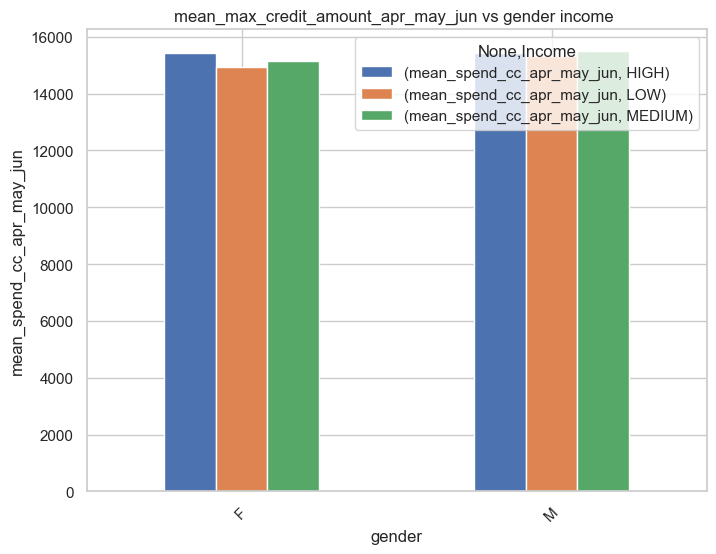

In [148]:
m.plot(kind='bar', figsize=(8, 6))
plt.title('mean_max_credit_amount_apr_may_jun vs gender income ')
plt.xlabel('gender')
plt.ylabel('mean_spend_cc_apr_may_jun')
plt.xticks(rotation=45)
plt.show()

In [149]:
gender_count=final_df.groupby('gender').agg(count=('gender','count')).reset_index()
gender_count

,gender,count
0,F,2712
1,M,17287


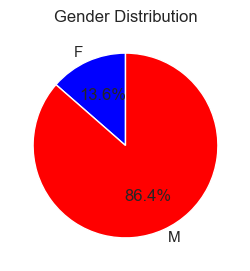

In [150]:
plt.figure(figsize=(3,3))
plt.pie(gender_count['count'], labels=gender_count['gender'], autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Gender Distribution')
plt.show()

In [151]:
final_df.loc[final_df.age>100,['age']]


,age
29,222
47,221
80,120
144,118
248,223
...,...
19834,223
19838,221
19923,222
19962,223


In [152]:
mm=final_df.groupby('gender').agg(sum_mean_investments_june=('mean_investments_june','mean'))


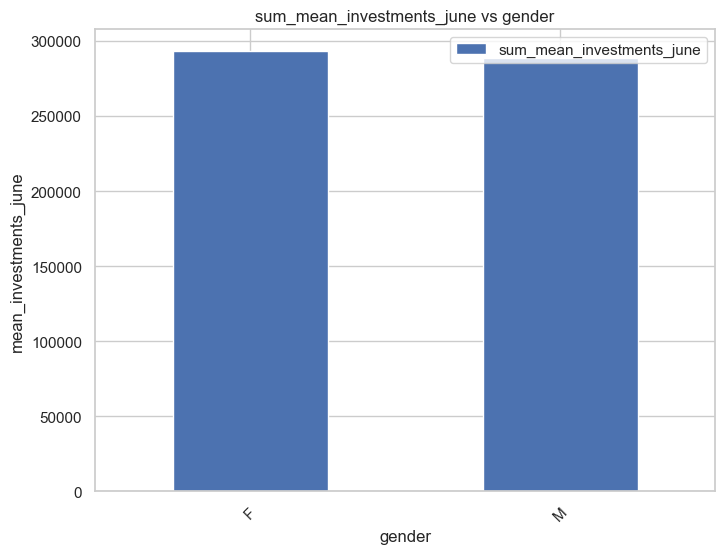

In [153]:
mm.plot(kind='bar', figsize=(8, 6))
plt.title('sum_mean_investments_june vs gender')
plt.xlabel('gender')
plt.ylabel('mean_investments_june')
plt.xticks(rotation=45)
plt.show()

In [154]:
final_df.keys()

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Tenure_with_Bank',
       'region_code', 'NetBanking_Flag', 'Avg_days_between_transaction',
       'card_lim', 'emi_active', 'mean_spend_cc_apr_may_jun',
       'mean_spend_dc_cons_apr_may_jun', 'mean_cc_count_apr_may_jun',
       'mean_dc_count_apr_may_jun', 'mean_investments_june',
       'mean_credit_amount_apr,may_jun', 'mean_debit_amount_apr_may_jun',
       'mean_credit_count_apr_may_jun', 'mean_debit_count_apr_may_jun',
       'mean_max_credit_amount_apr_may_jun', 'cc_cons'],
      dtype='object')

 # REPORT ON : 
 ## Data Exploratory analysis

##### ----->In this final_df dataframe having  20000 rows and 23 columns are there
##### ----->final_df dataframe having 20 numericals_columns and 3 categorical_columns are there
##### ----->age is highly overall correlated with Emp_Tenure_Years
##### ----->cc_cons has 5000 (25.0%) missing values and  some other columns have very low and those 5000 we need to use for predictions 
##### ----->outliers are there in the data but according to the data those  values are not outlires but we need to contol thode outlies 
##### -----> age column have more misleading  values means age > 100  like that ,so i removed those 
##### -----> the mean of the males and females max_credit_amount_apr_may_jun are  very similar ,but  in that data males are in 86% and females are 13% 

# 

# MODEL PREPARATION


In [155]:
behaviour =pd.read_excel("D:/A LABS FLODER/ML using python/CASE STUDYS/Predict Cred Card Consumption/CustomerBehaviorData.xlsx")
consumption=pd.read_excel("D:/A LABS FLODER/ML using python/CASE STUDYS/Predict Cred Card Consumption/CreditConsumptionData.xlsx")
demographic=pd.read_excel("D:/A LABS FLODER/ML using python/CASE STUDYS/Predict Cred Card Consumption/CustomerDemographics.xlsx")

In [156]:
df_1=pd.merge(left=behaviour,right=consumption,left_on=consumption['ID'],right_on=behaviour['ID'],how='inner')
df_1=df_1.drop('key_0',axis=1)

In [157]:
df_1


,ID_x,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,ID_y,cc_cons
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84,14081,10832.0
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69,5124,179050.0
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90,1119,888.0
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61,2390,1856.0
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89,4322,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,32944.0,105488.53,125470.83,21,50,58037.0,Y,7870.88,12512,NaN
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,8850.0,77112.66,86559.00,62,38,24110.0,Y,3668.30,14224,NaN
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,35819.0,57192.48,80627.00,2,18,1769.0,Y,5450.34,18740,NaN
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,39083.0,82039.00,24332.00,117,64,37255.0,Y,59.29,18134,NaN


In [158]:
df=pd.merge(left=df_1,right=demographic,left_on=df_1['ID_y'],right_on=demographic['ID'],how='inner')
df=df.drop(['key_0','ID_x','ID_y','ID'],axis=1)
df

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,cc_cons,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,...,10832.0,current,M,47,MEDIUM,8.1,8,814.0,1,17.0
1,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,...,179050.0,current,F,27,MEDIUM,6.3,7,249.0,1,7.0
2,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,...,888.0,current,M,35,MEDIUM,4.5,9,958.0,0,9.0
3,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,...,1856.0,current,M,58,MEDIUM,34.2,10,945.0,1,12.0
4,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,...,290.0,current,M,32,MEDIUM,10.8,10,249.0,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,...,NaN,current,M,35,MEDIUM,13.5,1,523.0,0,7.0
19996,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,...,NaN,current,M,53,MEDIUM,9.9,7,723.0,1,2.0
19997,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,...,NaN,current,M,62,HIGH,37.8,8,863.0,1,16.0
19998,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,1,...,NaN,current,M,34,MEDIUM,12.6,4,882.0,0,13.0


In [159]:
df_new = df.loc[ df.cc_cons.isna() ]
df_new.drop('cc_cons',axis=1,inplace=True)
df_new.dropna(inplace=True)

In [160]:
# separating the new customers and existing customers
df = df.loc[ df.cc_cons.notna() ]
df.dropna(inplace=True)

In [161]:
y=df['cc_cons']

In [162]:
df.drop('cc_cons',axis=1,inplace=True)

In [163]:
num=df.select_dtypes(exclude ='object').columns

In [164]:
cat=df.select_dtypes(include ='object').columns

In [165]:
def rmspe(train_preds_pipe1, y_train):
    mask = train_preds_pipe1 != 0
    rmspe = np.sqrt(np.mean(np.square((train_preds_pipe1 - y_train) / train_preds_pipe1)[mask] ** 2))
    return rmspe

In [166]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [167]:
ct1 = ColumnTransformer(
    transformers=[
    ('olt',RobustScaler(),num),
    ('Ohe',OneHotEncoder(drop='first'),cat),
    ( "enc" ,OrdinalEncoder(),["Income"])
                    ])

In [168]:
pd.DataFrame(ct1.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.040442,2.850774,-0.104353,-0.208931,1.332836,-0.431786,-0.025641,0.371429,0.235294,1.782609,...,0.156250,0.4,-0.309333,-1.0,0.5,0.0,1.0,1.0,0.0,1.0
1,0.250402,0.085584,1.159722,-0.232576,0.733895,1.301810,13.358974,-0.200000,-0.568627,1.608696,...,-0.562500,0.0,0.080000,0.0,0.6,0.0,1.0,0.0,1.0,2.0
2,0.089679,-0.321509,1.347575,-0.488418,-0.566152,-0.357199,1.282051,-0.142857,0.294118,-0.260870,...,-0.414062,-0.6,0.626667,0.0,0.5,0.0,1.0,1.0,0.0,1.0
3,0.302741,1.369451,-0.163937,-0.296477,-0.439483,2.433045,2.410256,-0.028571,-0.568627,-0.217391,...,-0.429688,-0.6,-0.365333,0.0,-0.4,0.0,1.0,1.0,0.0,1.0
4,0.320973,1.116323,-0.149130,0.172106,-0.440864,0.149961,0.410256,0.571429,0.000000,0.478261,...,0.257813,-0.2,0.776000,-1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,-0.177305,-0.277586,-0.520812,1.133903,0.046585,0.090589,0.410256,-0.371429,0.000000,0.652174,...,-0.640625,0.4,0.064000,0.0,0.0,0.0,1.0,1.0,0.0,1.0
10041,-0.115074,2.252757,-0.330266,-0.546896,1.301717,-0.309976,0.410256,-0.371429,-0.117647,0.478261,...,0.085937,0.6,-0.320000,-1.0,0.7,1.0,1.0,0.0,1.0,2.0
10042,1.770672,-0.432414,-0.230515,-0.343836,0.032820,-0.349017,-0.102564,0.685714,1.470588,-0.260870,...,1.523438,0.0,0.485333,0.0,0.8,0.0,1.0,0.0,1.0,2.0
10043,0.376540,0.219836,7.748101,-0.317938,-0.525686,12.159245,-0.051282,2.171429,-0.588235,-0.217391,...,1.742188,-0.2,-0.298667,0.0,0.5,0.0,1.0,0.0,1.0,2.0


In [169]:
lr=LinearRegression()
rfr = RandomForestRegressor(max_depth=3)
knr=KNeighborsRegressor(n_neighbors=5,weights='uniform',metric='euclidean')
svr = SVR(kernel='poly',C=0.1)

In [170]:
pipe1=Pipeline(steps=[
    ('col_transformation',ct1),
    ('Feature Selection',SelectKBest(f_classif,k=30)),
    ('linear_regression',lr)
])

pipe2=Pipeline(steps=[
    ('col_transformation',ct1),
    ('Feature Selection',SelectKBest(f_classif,k=30)),
    ('Random Forest',rfr)
])

pipe3=Pipeline(steps=[
    ('col_transformation',ct1),
    ('Feature Selection',SelectKBest(f_classif,k=30)),
    ('KNN Regressor',knr)
])

pipe4=Pipeline(steps=[
    ('col_transformation',ct1),
    ('Feature Selection',SelectKBest(f_classif,k=30)),
    ('Support Vector Machine',svr)
])

In [171]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('col_transformation',
                 ColumnTransformer(transformers=[('olt', RobustScaler(),
                                                  Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed...
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'age',
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')),
                                                 ('Ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['loan_enq', 'account_type', 'gender', 'Income'], dtype='object')),
                                                 ('enc', OrdinalEncoder(),
                                                  ['Income'])])),
                ('Feature Selection', SelectKBest(k=30)),
                ('linear_regression', LinearRegression())])

In [172]:
train_preds_pipe1 = pipe1.predict(X_train)
test_preds_pipe1 = pipe1.predict(X_test)

In [173]:
print("MAE train pipe1 :: ",mean_absolute_error(train_preds_pipe1, y_train))
print("MAE test pipe1 :: ",mean_absolute_error(test_preds_pipe1, y_test))
print("MAPE train pipe1 :: ",mean_absolute_percentage_error(train_preds_pipe1, y_train))
print("MAPE test pipe1 :: ",mean_absolute_percentage_error(test_preds_pipe1, y_test))
print("MSE train pipe1 :: ",mean_squared_error(train_preds_pipe1, y_train))
print("MSE test pipe1 :: ",mean_squared_error(test_preds_pipe1, y_test))
print("RMSPE train pipe1 :: ",rmspe(train_preds_pipe1,y_train))
print("RMSPE test pipe1 :: ",rmspe(test_preds_pipe1,y_test))

MAE train pipe1 ::  71062.07582653266
MAE test pipe1 ::  69095.94308120386
MAPE train pipe1 ::  1.2636497959119908
MAPE test pipe1 ::  1.239625851332509
MSE train pipe1 ::  9722450814.60094
MSE test pipe1 ::  9127374600.71899
RMSPE train pipe1 ::  7.941170420228219
RMSPE test pipe1 ::  8.035455687872503


In [174]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('col_transformation',
                 ColumnTransformer(transformers=[('olt', RobustScaler(),
                                                  Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed...
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')),
                                                 ('Ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['loan_enq', 'account_type', 'gender', 'Income'], dtype='object')),
                                                 ('enc', OrdinalEncoder(),
                                                  ['Income'])])),
                ('Feature Selection', SelectKBest(k=30)),
                ('Random Forest', RandomForestRegressor(max_depth=3))])

In [175]:
train_preds_pipe2 = pipe2.predict(X_train)
test_preds_pipe2 = pipe2.predict(X_test)

In [176]:
print("MAE train pipe2 :: ",mean_absolute_error(train_preds_pipe2, y_train))
print("MAE test  pipe2 :: ",mean_absolute_error(test_preds_pipe2, y_test))
print("RMAPE train  pipe2 :: ",np.sqrt(mean_absolute_percentage_error(train_preds_pipe2, y_train)))
print("RMAPE test  pipe2 :: ",np.sqrt(mean_absolute_percentage_error(test_preds_pipe2, y_test)))
print("RMSPE train pipe2 :: ",rmspe(train_preds_pipe2,y_train))
print("RMSPE test pipe2 :: ",rmspe(test_preds_pipe2,y_test))

MAE train pipe2 ::  70785.94207809662
MAE test  pipe2 ::  69092.08567986515
RMAPE train  pipe2 ::  1.1181664500417343
RMAPE test  pipe2 ::  1.1094360228984796
RMSPE train pipe2 ::  7.361545845881235
RMSPE test pipe2 ::  7.263281740679807


In [177]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('col_transformation',
                 ColumnTransformer(transformers=[('olt', RobustScaler(),
                                                  Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed...
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')),
                                                 ('Ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['loan_enq', 'account_type', 'gender', 'Income'], dtype='object')),
                                                 ('enc', OrdinalEncoder(),
                                                  ['Income'])])),
                ('Feature Selection', SelectKBest(k=30)),
                ('KNN Regressor', KNeighborsRegressor(metric='euclidean'))])

In [178]:
train_preds_pipe3 = pipe3.predict(X_train)
test_preds_pipe3 = pipe3.predict(X_test)

In [179]:
print("MAE train pipe3 :: ",mean_absolute_error(train_preds_pipe3, y_train))
print("MAE test  pipe3 :: ",mean_absolute_error(test_preds_pipe3, y_test))
print("MAPE train  pipe3 :: ",mean_absolute_percentage_error(train_preds_pipe3, y_train))
print("MAPE test  pipe3 :: ",mean_absolute_percentage_error(test_preds_pipe3, y_test))
print("RMSPE train pipe3 :: ",rmspe(train_preds_pipe3,y_train))
print("RMSPE test pipe3 :: ",rmspe(test_preds_pipe3,y_test))

MAE train pipe3 ::  59282.10974614237
MAE test  pipe3 ::  70797.16884219035
MAPE train  pipe3 ::  0.9249389415203165
MAPE test  pipe3 ::  2.225039390918122
RMSPE train pipe3 ::  3.0322108087980904
RMSPE test pipe3 ::  478.0032119532038


In [180]:
pipe4.fit(X_train,y_train)

Pipeline(steps=[('col_transformation',
                 ColumnTransformer(transformers=[('olt', RobustScaler(),
                                                  Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed...
       'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction'],
      dtype='object')),
                                                 ('Ohe',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['loan_enq', 'account_type', 'gender', 'Income'], dtype='object')),
                                                 ('enc', OrdinalEncoder(),
                                                  ['Income'])])),
                ('Feature Selection', SelectKBest(k=30)),
                ('Support Vector Machine', SVR(C=0.1, kernel='poly'))])

In [181]:
train_preds_pipe4 = pipe4.predict(X_train)
test_preds_pipe4 = pipe4.predict(X_test)

In [182]:
print("MAE train pipe4 :: ",mean_absolute_error(train_preds_pipe4, y_train))
print("MAE test  pipe4 :: ",mean_absolute_error(test_preds_pipe4, y_test))
print("MAPE train  pipe4 :: ",mean_absolute_percentage_error(train_preds_pipe4, y_train))
print("MAPE test  pipe4 :: ",mean_absolute_percentage_error(test_preds_pipe4, y_test))
print("RMSPE train pipe4 :: ",rmspe(train_preds_pipe4,y_train))
print("RMSPE test pipe4 :: ",rmspe(test_preds_pipe4,y_test))

MAE train pipe4 ::  49554.02394457496
MAE test  pipe4 ::  46241.0197380792
MAPE train  pipe4 ::  3.69088389575576
MAPE test  pipe4 ::  3.438601919024136
RMSPE train pipe4 ::  179.22364716119836
RMSPE test pipe4 ::  168.15929120730448


In [183]:
for i, pipe in enumerate([pipe1, pipe2, pipe3, pipe4], start=1):
    pipe.fit(X_train, y_train)
    train_preds_pipe = pipe.predict(X_train)
    test_preds_pipe = pipe.predict(X_test)
    
    print(f"RMSPE train {pipe.__class__.__name__}{i} :: {rmspe(train_preds_pipe, y_train)}")
    print(f"RMSPE test {pipe.__class__.__name__}{i}:: {rmspe(test_preds_pipe, y_test)}")
    print()

RMSPE train Pipeline1 :: 7.941170420228219
RMSPE test Pipeline1:: 8.035455687872503

RMSPE train Pipeline2 :: 7.363187380406625
RMSPE test Pipeline2:: 7.2577324839283035

RMSPE train Pipeline3 :: 3.0322108087980904
RMSPE test Pipeline3:: 478.0032119532038

RMSPE train Pipeline4 :: 179.22364716119836
RMSPE test Pipeline4:: 168.15929120730448



Based on the results obtained from the pipelines, it seems that pipeline 1 and pipeline 2 perform better than pipeline 3 and pipeline 4. Additionally, between pipeline 1 and pipeline 2, pipeline 2 performs better for prediction purposes. Therefore, based on these observations, the conclusion is to use pipeline 2, which utilizes Random Forest regression, for predicting cc_cons. 

In [184]:
New=pd.DataFrame(pipe2.predict(df_new))
df_new=df_new.reset_index(drop = True)
df_new['pred_cc_cons']=New
df_new

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,pred_cc_cons
0,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,...,current,M,37,MEDIUM,11.9,4,575.0,1,16.0,54877.192113
1,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,...,current,M,33,MEDIUM,7.8,6,394.0,0,19.0,55017.503257
2,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,...,current,M,53,LOW,33.0,10,324.0,1,15.0,57875.700741
3,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,...,current,M,33,MEDIUM,7.8,5,370.0,1,7.0,65042.804982
4,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,...,current,M,62,LOW,12.6,9,505.0,1,3.0,57229.843478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,3043.000,742.20,3418.00,2181.94,12032.60,788.00,1.0,5,6,1,...,current,M,60,MEDIUM,24.0,5,968.0,0,9.0,57440.439337
4989,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,...,current,M,35,MEDIUM,13.5,1,523.0,0,7.0,53014.016854
4990,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,...,current,M,53,MEDIUM,9.9,7,723.0,1,2.0,55573.287915
4991,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,...,current,M,62,HIGH,37.8,8,863.0,1,16.0,58092.618728


## SAVEING THE PREDICTED  DF_NEW FILE USING PICKEL FILE 

In [189]:
df_new.to_pickle("D:/A LABS FLODER/ML using python/ML CASE STUDYS COMPLEDED FILES/PREDICT_CREDIT_CONSUMPTION/New folder.df_new_with_predictions.pkl")

In [187]:
df_new=pd.read_pickle("D:/A LABS FLODER/ML using python/ML CASE STUDYS COMPLEDED FILES/PREDICT_CREDIT_CONSUMPTION/New folder.df_new_with_predictions.pkl")

In [188]:
df_new

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,pred_cc_cons
0,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,...,current,M,37,MEDIUM,11.9,4,575.0,1,16.0,54877.192113
1,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,...,current,M,33,MEDIUM,7.8,6,394.0,0,19.0,55017.503257
2,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,...,current,M,53,LOW,33.0,10,324.0,1,15.0,57875.700741
3,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,...,current,M,33,MEDIUM,7.8,5,370.0,1,7.0,65042.804982
4,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,...,current,M,62,LOW,12.6,9,505.0,1,3.0,57229.843478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,3043.000,742.20,3418.00,2181.94,12032.60,788.00,1.0,5,6,1,...,current,M,60,MEDIUM,24.0,5,968.0,0,9.0,57440.439337
4989,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,...,current,M,35,MEDIUM,13.5,1,523.0,0,7.0,53014.016854
4990,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,...,current,M,53,MEDIUM,9.9,7,723.0,1,2.0,55573.287915
4991,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,...,current,M,62,HIGH,37.8,8,863.0,1,16.0,58092.618728
